<a href="https://colab.research.google.com/github/ulya1202/Data-science-projects/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score ,recall_score ,precision_score , accuracy_score, classification_report

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,OneHotEncoder,FunctionTransformer,TargetEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding,  LocallyLinearEmbedding

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier,VotingClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, SGDRegressor,SGDClassifier,LogisticRegression,ElasticNet, Lasso, Ridge
from sklearn.svm import LinearSVC, SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as bpline

In [ ]:
#!/bin/bash
!curl -L -o car-price-prediction.zip https://www.kaggle.com/api/v1/datasets/download/hellbuoy/car-price-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18523  100 18523    0     0  18119      0  0:00:01  0:00:01 --:--:-- 18119


In [ ]:
!unzip '/content/car-price-prediction.zip'

Archive:  /content/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', None)
nf=df.copy()

In [ ]:
nf

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0          two  convertible        rwd          front       88.6      168.8   
1          two  convertible        rwd          front       88.6      168.8   
2          two    hatchback        rwd          front       94.5      171.2   
3         four        sedan        fwd          front       99.8      176.6   
4         four        sedan        4wd          front       99.4      176.6   
..         ...          ...        ...            ...        ...        ...   
200       four        sedan        rwd          front      109.1      188.8   
201       four        sedan        rwd          front      109.1      188.8   
202       four        sedan        rwd          front      109.1      188.8   
203       four        sedan        rwd          front      109.1      188.8   
204       four        sedan        rwd          front      109.1      188.8   

     carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0        64.1       48.8        2548       dohc           four         130   
1        64.1       48.8        2548       dohc           four         130   
2        65.5       52.4        2823       ohcv            six         152   
3        66.2       54.3        2337        ohc           four         109   
4        66.4       54.3        2824        ohc           five         136   
..        ...        ...         ...        ...            ...         ...   
200      68.9       55.5        2952        ohc           four         141   
201      68.8       55.5        3049        ohc           four         141   
202      68.9       55.5        3012       ohcv            six         173   
203      68.9       55.5        3217        ohc            six         145   
204      68.9       55.5        3062        ohc           four         141   

    fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         mpfi       3.47    2.68               9.0         111     5000   
1         mpfi       3.47    2.68               9.0         111     5000   
2         mpfi       2.68    3.47               9.0         154     5000   
3         mpfi       3.19    3.40              10.0         102     5500   
4         mpfi       3.19    3.40               8.0         115     5500   
..         ...        ...     ...               ...         ...      ...   
200       mpfi       3.78    3.15               9.5         114     5400   
201       mpfi       3.78    3.15               8.7         160     5300   
202       mpfi       3.58    2.87               8.8         134     5500   
203        idi       3.01    3.40              23.0         106     4800   
204       mpfi       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18     

In [ ]:
X=nf.drop(['price','car_ID'], axis=1)

In [ ]:
y=nf['price'].copy()

In [ ]:
new_X=X.copy()

In [ ]:
new_X['w*h*l']=nf['carlength']*nf['carwidth']*nf['carheight']

In [ ]:
new_X=new_X.drop(['carlength','carwidth','carheight'], axis=1)

# Functions

In [ ]:
def columns_with_less_importance(df,percentage_of_null ):
    null_percentage=(df.isnull().sum()/len(df))*100
    return null_percentage[(null_percentage>=percentage_of_null)]

In [ ]:
def null_columns_drop(df,percentage_of_null,inplace ):
    null_percentage=(df.isnull().sum()/len(df))*100
    columns_to_drop=null_percentage[(null_percentage>=percentage_of_null)].index
    return df.drop(columns_to_drop, axis=1, inplace=inplace)

In [ ]:
def remove_non_digits(df,columns_name, integer=False):
    nf=df.copy()
    c=columns_name
    for x in c:
        nf.replace({x:'[^\d^.]'},value='', regex=True, inplace=True)
        if int:
            nf[x]=pd.to_numeric(nf[x],errors='coerce', downcast='integer')
    return nf

In [ ]:
#bezi columlarda unikal qiyemtlere baxiram
def check_uniq_in_col(dataframe, columns):
    di={}
    for col  in columns:
        di[col]=nf[col].unique()
    return di

In [ ]:
def cylindernumber_to_int(x):
    di={'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8, 'one':1, 'seven':7, 'eight':8, 'nine':9,'ten':10, 'eleven':11}
    if x in di:
        x=di[x]
    else:
        x=None
    return x

In [ ]:
def split_car_name(df):
    return df.split()[0]

In [ ]:
def split_name(df):
    return df.split('_')[2]

In [ ]:
class Outliered:
    def __init__(self,full_data,data_columns):
        self.full_datas=full_data
        self.copies_full=full_data.copy(deep=True)
        self.copies_datas=full_data[data_columns].copy(deep=True)
        self.datas=full_data[data_columns]
        self.Q1 = np.percentile(self.datas, 25)
        self.Q2 = np.percentile(self.datas, 50)
        self.Q3 = np.percentile(self.datas, 75)
        self.IQR = self.Q3 - self.Q1
        self.low_lim = self.Q1 - 1.5 * self.IQR
        self.up_lim = self.Q3 + 1.5 * self.IQR

    def restore_data(self):

        self.full_datas = self.copies_full
        return self.copies_full


    def outliers(self):
        outlier =[]
        for x in self.datas:
            if ((x> self.up_lim) or (x<self.low_lim)):
                outlier.append(x)
        return np.array([outlier])

    def capp(self, inplace=False):
        # new_df_cap=np.where(self.datas>self.up_lim,self.up_lim,
        #                    np.where(self.datas<self.low_lim, self.low_lim, self.datas))

        if inplace==False:
            return self.datas.clip(upper=self.up_lim,lower=self.low_lim, inplace=inplace)

        self.datas.clip(upper=self.up_lim,lower=self.low_lim, inplace=inplace)
        return self.datas

        #     return self.datas
        # else:
        #     return new_df_cap

    def trim(self,inplace=False, trim_upper=True, trim_lower=False):
        index_for_drop=[]
        if  trim_upper==True and trim_lower==False:
            index_for_drop.extend(self.full_datas[self.datas>self.up_lim].index)
        elif trim_upper==True and trim_lower==True:
            index_for_drop.extend(self.full_datas[(self.datas>self.up_lim)&(self.datas<self.low_lim)].index)
        elif trim_upper==False and trim_lower==True:
            index_for_drop.extend(self.full_datas[self.datas<self.low_lim].index)

        return self.full_datas.drop(index_for_drop, axis=0, inplace=inplace)


        # if inplace:
        #     if trim_upper==True and trim_lower==False:
        #         self.full_datas=self.full_datas[self.datas <= self.up_lim]

        #     elif trim_upper==True and trim_lower==True:
        #         self.full_datas = self.full_datas[(self.datas >= self.low_lim) & (self.datas <= self.up_lim)]

        #     elif trim_upper==False and trim_lower==True:
        #         self.full_datas=self.full_datas[self.datas >= self.low_lim]


        #     return self.full_datas

        # else:
        #     if trim_upper==True and trim_lower==False:
        #         return self.full_datas[self.datas <= self.up_lim]

        #     elif trim_upper==True and trim_lower==True:
        #         return self.full_datas[(self.datas >= self.low_lim) & (self.datas <= self.up_lim)]

        #     elif trim_upper==False and trim_lower==True:
        #         return self.full_datas[self.datas >= self.low_lim]
        #     else:
        #         return self.full_datas

    #      if inplace:
    #         new_df_trim=self.datas
    #      else:
    #         new_df_trimp=self.copy
    #     new_df_trim


#EDA

## Check

In [ ]:
new_X.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
w*h*l               0
dtype: int64

In [ ]:
new_X.duplicated().sum()

np.int64(0)

In [ ]:
new_X.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
w*h*l               float64
dtype: object

In [ ]:
check_uniq_in_col(new_X, new_X.select_dtypes(exclude=[np.number]).columns)

{'CarName': array(['alfa-romero giulia', 'alfa-romero stelvio',
        'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
        'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
        'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
        'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
        'dodge rampage', 'dodge challenger se', 'dodge d200',
        'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
        'dodge coronet custom', 'dodge dart custom',
        'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
        'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
        'honda accord', 'honda civic 1300', 'honda prelude',
        'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
        'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
        'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
        'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx

In [ ]:
new_X['cylindernumber']=new_X['cylindernumber'].apply(cylindernumber_to_int)

In [ ]:
new_X['doornumber']=new_X['doornumber'].apply(cylindernumber_to_int)

# Statistics

In [ ]:
new_full = pd.concat([new_X, y], axis=1)
new_full_num=new_full.select_dtypes(include=[np.number])

In [ ]:
from scipy import stats
from scipy.stats import kurtosis, skew, mode
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


**!!!! MEN BU MELUMATLARA TARIN_TEST_ SPLITDEN EVVEL BAXMISAM

## 4.1. Mərkəzi meyl ölçüləri

###numerical columns

##### mean ,mode, median

In [ ]:

m1 = pd.Series(mode(new_full_num)[0], index=new_full_num.columns, name='mode')
m2=pd.Series(mode(new_full_num)[1], index=new_full_num.columns, name='freq_of_mode') # Convert m1 to Series
medians = new_full_num.quantile(0.5)
q3=new_full_num.quantile(0.75)
q3.name='Q3'
q1=new_full_num.quantile(0.25)
q1.name='Q1'
iqr=q3-q1
max=q1+iqr*1.5
max.name='max'
min=q1-1.5*iqr
min.name='min'
medians.name='median'
means = new_full_num.mean()
means.name='mean'
stds=new_full_num.std()
stds.name='std'
mmm=pd.concat([m1,m2, medians, means,stds,q1,q3,min,max], axis=1)
mmm


mode  freq_of_mode     median           mean  \
symboling              0.000          67.0       1.00       0.834146   
doornumber             4.000         115.0       4.00       3.121951   
wheelbase             94.500          21.0      97.00      98.756585   
curbweight          2385.000           4.0    2414.00    2555.565854   
cylindernumber         4.000         159.0       4.00       4.380488   
enginesize            92.000          15.0     120.00     126.907317   
boreratio              3.620          23.0       3.31       3.329756   
stroke                 3.400          20.0       3.29       3.255415   
compressionratio       9.000          46.0       9.00      10.142537   
horsepower            68.000          19.0      95.00     104.117073   
peakrpm             5500.000          37.0    5200.00    5125.121951   
citympg               31.000          28.0      24.00      25.219512   
highwaympg            25.000          19.0      30.00      30.751220   
w*h*l             626421.695           7.0  601385.70  618719.288873   
price               5572.000           2.0   10295.00   13276.710571   

                           std         Q1         Q3         min         max  
symboling             1.245307       0.00       2.00      -3.000       3.000  
doornumber            0.994966       2.00       4.00      -1.000       5.000  
wheelbase             6.021776      94.50     102.40      82.650     106.350  
curbweight          520.680204    2145.00    2935.00     960.000    3330.000  
cylindernumber        1.080854       4.00       4.00       4.000       4.000  
enginesize           41.642693      97.00     141.00      31.000     163.000  
boreratio             0.270844       3.15       3.58       2.505       3.795  
stroke                0.313597       3.11       3.41       2.660       3.560  
compressionratio      3.972040       8.60       9.40       7.400       9.800  
horsepower           39.544167      70.00     116.00       1.000     139.000  
peakrpm             476.985643    4800.00    5500.00    3750.000    5850.000  
citympg               6.542142      19.00      30.00       2.500      35.500  
highwaympg            6.886443      25.00      34.00      11.500      38.500  
w*h*l             79463.195262  566490.60  666250.20  416851.200  716130.000  
price              7988.852332    7788.00   16503.00   -5284.500   20860.500

In [ ]:
mmm['mode'].loc['w*h*l']

np.float64(626421.695)

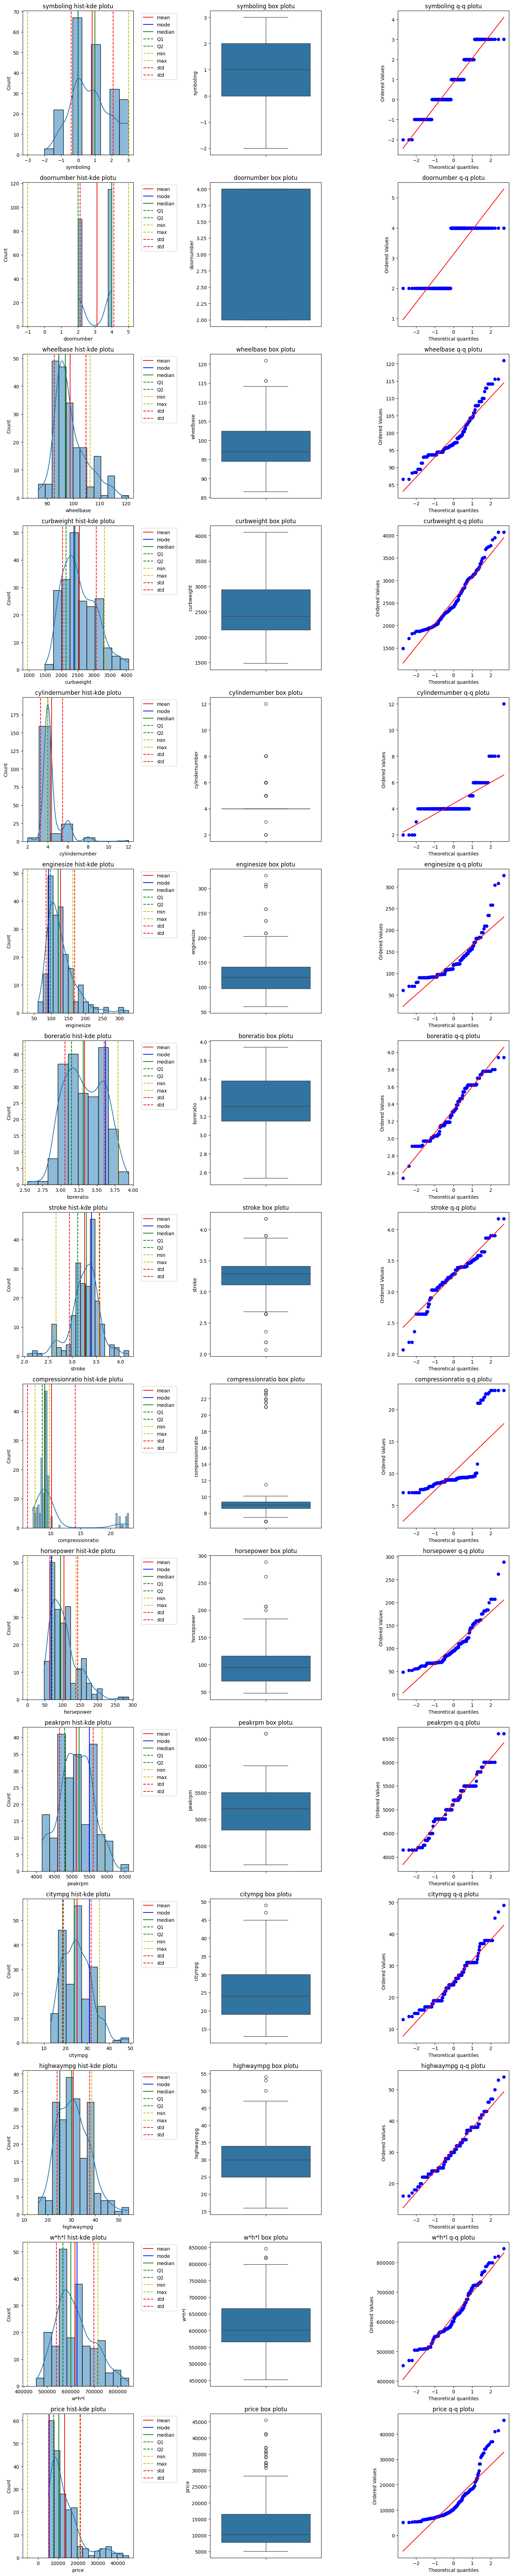

In [ ]:
fig, axes = plt.subplots(new_full_num.shape[1], 3, figsize=(15, 5 * new_full_num.shape[1]))  # Daha böyük ölçü
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i,col in enumerate(new_full_num):

    sns.histplot(data=new_full_num, x=new_full_num[col], kde=True, ax=axes[i, 0])
    axes[i,0].axvline(x=mmm['mean'].loc[col], ymin=0, color='r', label='mean')
    axes[i,0].axvline(x=mmm['mode'].loc[col], ymin=0, color='b', label='mode')
    axes[i,0].axvline(x=mmm['median'].loc[col], ymin=0, color='g',label='median')
    axes[i,0].axvline(x=mmm['Q1'].loc[col], ymin=0, color='g',linestyle='--',label='Q1')
    axes[i,0].axvline(x=mmm['Q1'].loc[col], ymin=0, color='g',linestyle='--',label='Q2')
    axes[i,0].axvline(x=mmm['min'].loc[col], ymin=0, color='y',linestyle='--',label='min')
    axes[i,0].axvline(x=mmm['max'].loc[col], ymin=0, color='y',linestyle='--',label='max')
    axes[i,0].axvline(x=mmm['mean'].loc[col]-mmm['std'].loc[col], ymin=0, color='r',linestyle='--',label='std')
    axes[i,0].axvline(x=mmm['mean'].loc[col]+mmm['std'].loc[col], ymin=0, color='r',linestyle='--',label='std')
    axes[i,0].set_title(f'{col} hist-kde plotu')
    axes[i, 0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    sns.boxplot(data=new_full_num[col], ax=axes[i, 1])
    axes[i,1].set_title(f'{col} box plotu')

    stats.probplot(new_full_num[col], dist="norm", plot=axes[i, 2])
    axes[i,2].set_title(f'{col} q-q plotu')

# plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()




### kurtosis, skew

**Skew**

If the absolute value of skew<0.5 then very symmetric.

If the absolute value of skew is in between 0.5 and 1 then slightly skewed

If the absolute value of skew is greater than 1 then very skewed

**Kurtosis**

Kurtosis = 3 → Mesokurtic (Normal Paylanma)

Məsələn: Standart Normal Paylanma (Gaussian Distribution).

Kurtosis > 3 → Leptokurtic (Çox Çəkili)

Çox böyük dəyərlər daha sıx rast gəlinir, quyruqlar ağırdır (fat tails).

Outlier-lər ehtimalı yüksəkdir.

Məsələn: Maliyyə bazarlarındakı qiymət dəyişiklikləri.

Kurtosis < 3 → Platykurtic (Az Çəkili)

Dəyərlər daha bərabər paylanır, quyruqlar yüngüldür.

Outlier ehtimalı aşağıdır.

Məsələn: Təsadüfi vahid paylanma (Uniform Distribution).

In [ ]:
new_full_num=new_full.select_dtypes(include=[np.number])
kurtosises=kurtosis(new_full_num)
skews=skew(new_full_num)

kurtosises=kurtosis(new_full_num)
skews=skew(new_full_num)
# modes = [mode(new_full_num[col]).mode[0] if len(mode(new_full_num[col]).mode) > 0 else mode(new_full_num[col]).mode for col in new_full_num.columns]
# freq_of_modes=[mode(new_full_num[col].mode[1] for col in new_full_num.columns)]
d={'kurtosis':kurtosises,'skew':skews}
c=pd.DataFrame(d, index=new_full_num.columns)
c

kurtosis      skew
symboling         -0.689015  0.209525
doornumber        -1.939614 -0.245737
wheelbase          0.963276  1.042514
curbweight        -0.070942  0.676402
cylindernumber    13.353508  2.796801
enginesize         5.148030  1.933375
boreratio         -0.795151  0.020009
stroke             2.092597 -0.684648
compressionratio   5.077161  2.591720
horsepower         2.589862  1.395006
peakrpm            0.055528  0.074608
citympg            0.535505  0.658838
highwaympg         0.400284  0.536038
w*h*l             -0.223649  0.562080
price              2.948598  1.764644

In [ ]:
kur=c['kurtosis'].map(lambda x: 'normal' if x==3 else 'outlierler_var' if x>3 else 'outlier_olma_ehtimali_ashaqi' if x<3 else x)
skw=c['skew'].map(lambda x: 'simmetrik' if abs(x)<0.5 else 'biraz_meyl' if abs(x)<1 and abs(x)>0.5 else 'cox_meyl' if abs(x)>1 else x )
kurtosis_skew_explanantion=pd.concat([kur,skw], axis=1)
kurtosis_skew_explanantion

kurtosis        skew
symboling         outlier_olma_ehtimali_ashaqi   simmetrik
doornumber        outlier_olma_ehtimali_ashaqi   simmetrik
wheelbase         outlier_olma_ehtimali_ashaqi    cox_meyl
curbweight        outlier_olma_ehtimali_ashaqi  biraz_meyl
cylindernumber                  outlierler_var    cox_meyl
enginesize                      outlierler_var    cox_meyl
boreratio         outlier_olma_ehtimali_ashaqi   simmetrik
stroke            outlier_olma_ehtimali_ashaqi  biraz_meyl
compressionratio                outlierler_var    cox_meyl
horsepower        outlier_olma_ehtimali_ashaqi    cox_meyl
peakrpm           outlier_olma_ehtimali_ashaqi   simmetrik
citympg           outlier_olma_ehtimali_ashaqi  biraz_meyl
highwaympg        outlier_olma_ehtimali_ashaqi  biraz_meyl
w*h*l             outlier_olma_ehtimali_ashaqi  biraz_meyl
price             outlier_olma_ehtimali_ashaqi    cox_meyl

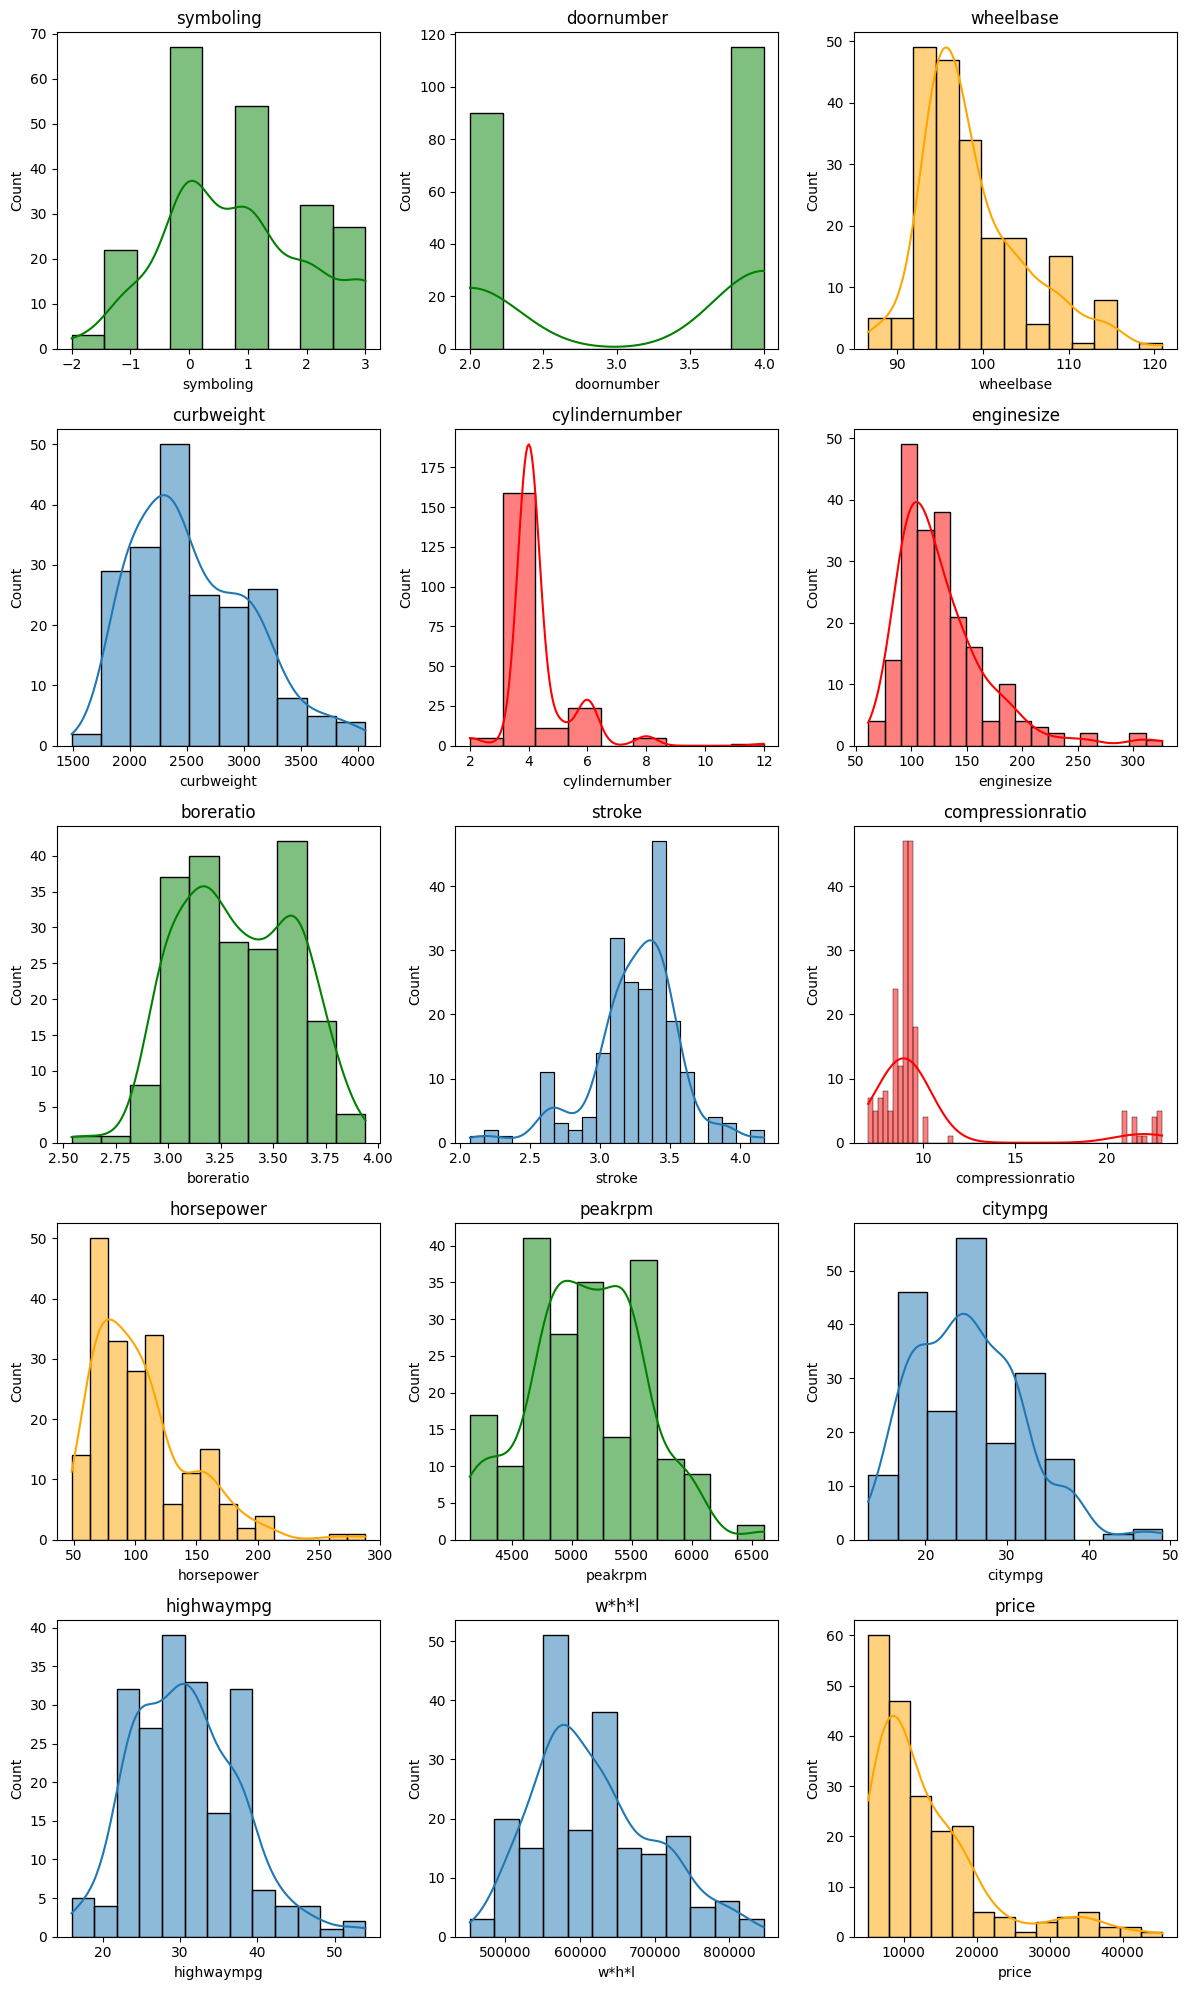

In [ ]:
row=int(np.ceil(len(new_full_num.columns)/3))
figure,ax=plt.subplots(row,3,figsize=(12,4*row))


for i,col in enumerate(new_full_num.columns):
    rows,columns=divmod(i,3)
    if kurtosis_skew_explanantion['kurtosis'].loc[col]=='outlierler_var' and kurtosis_skew_explanantion['skew'].loc[col]=='cox_meyl':
        sns.histplot(data=new_full_num, x=col, kde=True, color='r', ax=ax[rows, columns])
        ax[rows, columns].set_title(col)
    elif kurtosis_skew_explanantion['kurtosis'].loc[col]=='outlier_olma_ehtimali_ashaqi' and kurtosis_skew_explanantion['skew'].loc[col]=='simmetrik':
        sns.histplot(data=new_full_num, x=col,color='g',kde=True, ax=ax[rows, columns])
        ax[rows, columns].set_title(col)
    elif kurtosis_skew_explanantion['kurtosis'].loc[col]=='outlier_olma_ehtimali_ashaqi' and kurtosis_skew_explanantion['skew'].loc[col]=='cox_meyl':
        sns.histplot(data=new_full_num, x=col,color='orange' ,kde=True, ax=ax[rows, columns])
        ax[rows, columns].set_title(col)
    else:
        sns.histplot(data=new_full_num, x=col, kde=True, ax=ax[rows, columns])
        ax[rows, columns].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
pd.concat([new_full.describe().T, c], axis=1)

count           mean           std         min        25%  \
symboling         205.0       0.834146      1.245307      -2.000       0.00   
doornumber        205.0       3.121951      0.994966       2.000       2.00   
wheelbase         205.0      98.756585      6.021776      86.600      94.50   
curbweight        205.0    2555.565854    520.680204    1488.000    2145.00   
cylindernumber    205.0       4.380488      1.080854       2.000       4.00   
enginesize        205.0     126.907317     41.642693      61.000      97.00   
boreratio         205.0       3.329756      0.270844       2.540       3.15   
stroke            205.0       3.255415      0.313597       2.070       3.11   
compressionratio  205.0      10.142537      3.972040       7.000       8.60   
horsepower        205.0     104.117073     39.544167      48.000      70.00   
peakrpm           205.0    5125.121951    476.985643    4150.000    4800.00   
citympg           205.0      25.219512      6.542142      13.000      19.00   
highwaympg        205.0      30.751220      6.886443      16.000      25.00   
w*h*l             205.0  618719.288873  79463.195262  452643.156  566490.60   
price             205.0   13276.710571   7988.852332    5118.000    7788.00   

                        50%        75%         max   kurtosis      skew  
symboling              1.00       2.00       3.000  -0.689015  0.209525  
doornumber             4.00       4.00       4.000  -1.939614 -0.245737  
wheelbase             97.00     102.40     120.900   0.963276  1.042514  
curbweight          2414.00    2935.00    4066.000  -0.070942  0.676402  
cylindernumber         4.00       4.00      12.000  13.353508  2.796801  
enginesize           120.00     141.00     326.000   5.148030  1.933375  
boreratio              3.31       3.58       3.940  -0.795151  0.020009  
stroke                 3.29       3.41       4.170   2.092597 -0.684648  
compressionratio       9.00       9.40      23.000   5.077161  2.591720  
horsepower            95.00     116.00     288.000   2.589862  1.395006  
peakrpm             5200.00    5500.00    6600.000   0.055528  0.074608  
citympg               24.00      30.00      49.000   0.535505  0.658838  
highwaympg            30.00      34.00      54.000   0.400284  0.536038  
w*h*l             601385.70  666250.20  846007.659  -0.223649  0.562080  
price              10295.00   16503.00   45400.000   2.948598  1.764644

###object columns

In [ ]:
new_full_cat=new_full.copy()

In [ ]:
new_full_cat['car_brand']=new_full_cat['CarName'].apply(split_car_name)

In [ ]:
new_full_cat.describe(include='O')

CarName fueltype aspiration carbody drivewheel enginelocation  \
count           205      205        205     205        205            205   
unique          147        2          2       5          3              2   
top     peugeot 504      gas        std   sedan        fwd          front   
freq              6      185        168      96        120            202   

       enginetype fuelsystem car_brand  
count         205        205       205  
unique          7          8        28  
top           ohc       mpfi    toyota  
freq          148         94        31

In [ ]:
index_of_top_5_brands=new_full_cat['car_brand'].value_counts().nlargest(12).index
new_car_brand_top_5=new_full_cat['car_brand'].where(new_full_cat['car_brand'].isin(index_of_top_5_brands), other='others').value_counts()

In [ ]:
# plt.pie(new_car_brand_top_5, labels=new_car_brand_top_5.index, autopct='%1.1f%%',textprops={'size': 'smaller'});

In [ ]:
car_brands_count=new_full_cat['car_brand'].value_counts().reset_index()


In [ ]:
# sns.barplot(data=car_brands_count, x="car_brand",y='count' )
# plt.xticks(rotation=90);

In [ ]:
# new_full_cat['fueltype']

In [ ]:
new_full_cat_col=new_full_cat.drop(['CarName'],axis=1).select_dtypes(exclude=[np.number]).columns

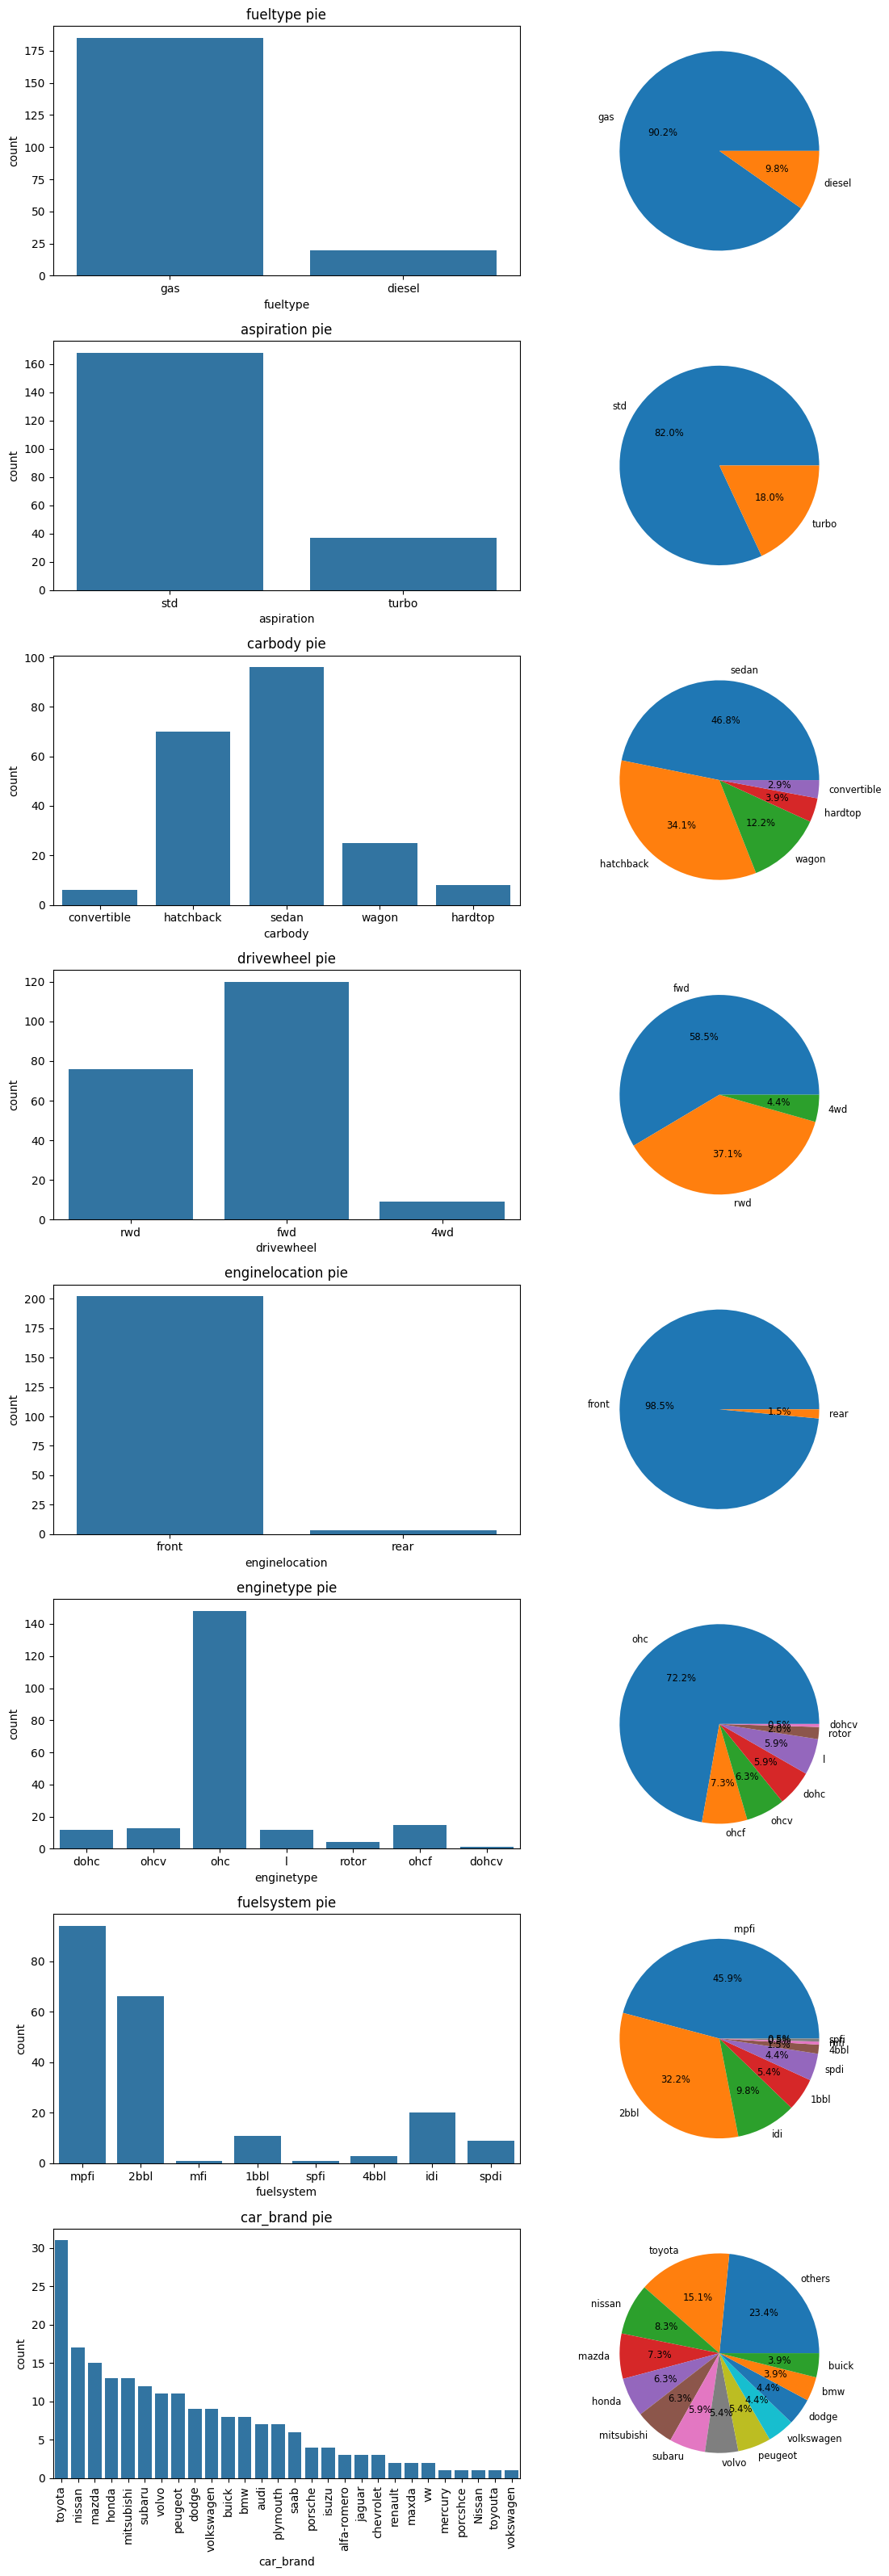

In [ ]:
fig, axes = plt.subplots(len(new_full_cat_col), 2, figsize=(12,4 * len(new_full_cat_col)))  # Daha böyük ölçü
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i,col in enumerate(new_full_cat_col):
    if col=='car_brand':
        sns.barplot(data=car_brands_count, x="car_brand",y='count',ax=axes[i, 0] )
        axes[i, 0].tick_params(axis='x', rotation=90)
        axes[i,0].set_title(f'{col} barplot')
        axes[i,1].pie(new_car_brand_top_5, labels=new_car_brand_top_5.index, autopct='%1.1f%%',textprops={'size': 'smaller'})
        axes[i,0].set_title(f'{col} pie')
    else:
        sns.countplot(data=new_full_cat,x=col, ax=axes[i,0])
        axes[i,0].set_title(f'{col} barplot')
        axes[i,1].pie(new_full_cat[col].value_counts().values ,labels=new_full_cat[col].value_counts().index ,autopct='%1.1f%%',textprops={'size': 'smaller'} )
        axes[i,0].set_title(f'{col} pie')


# plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

## relationships

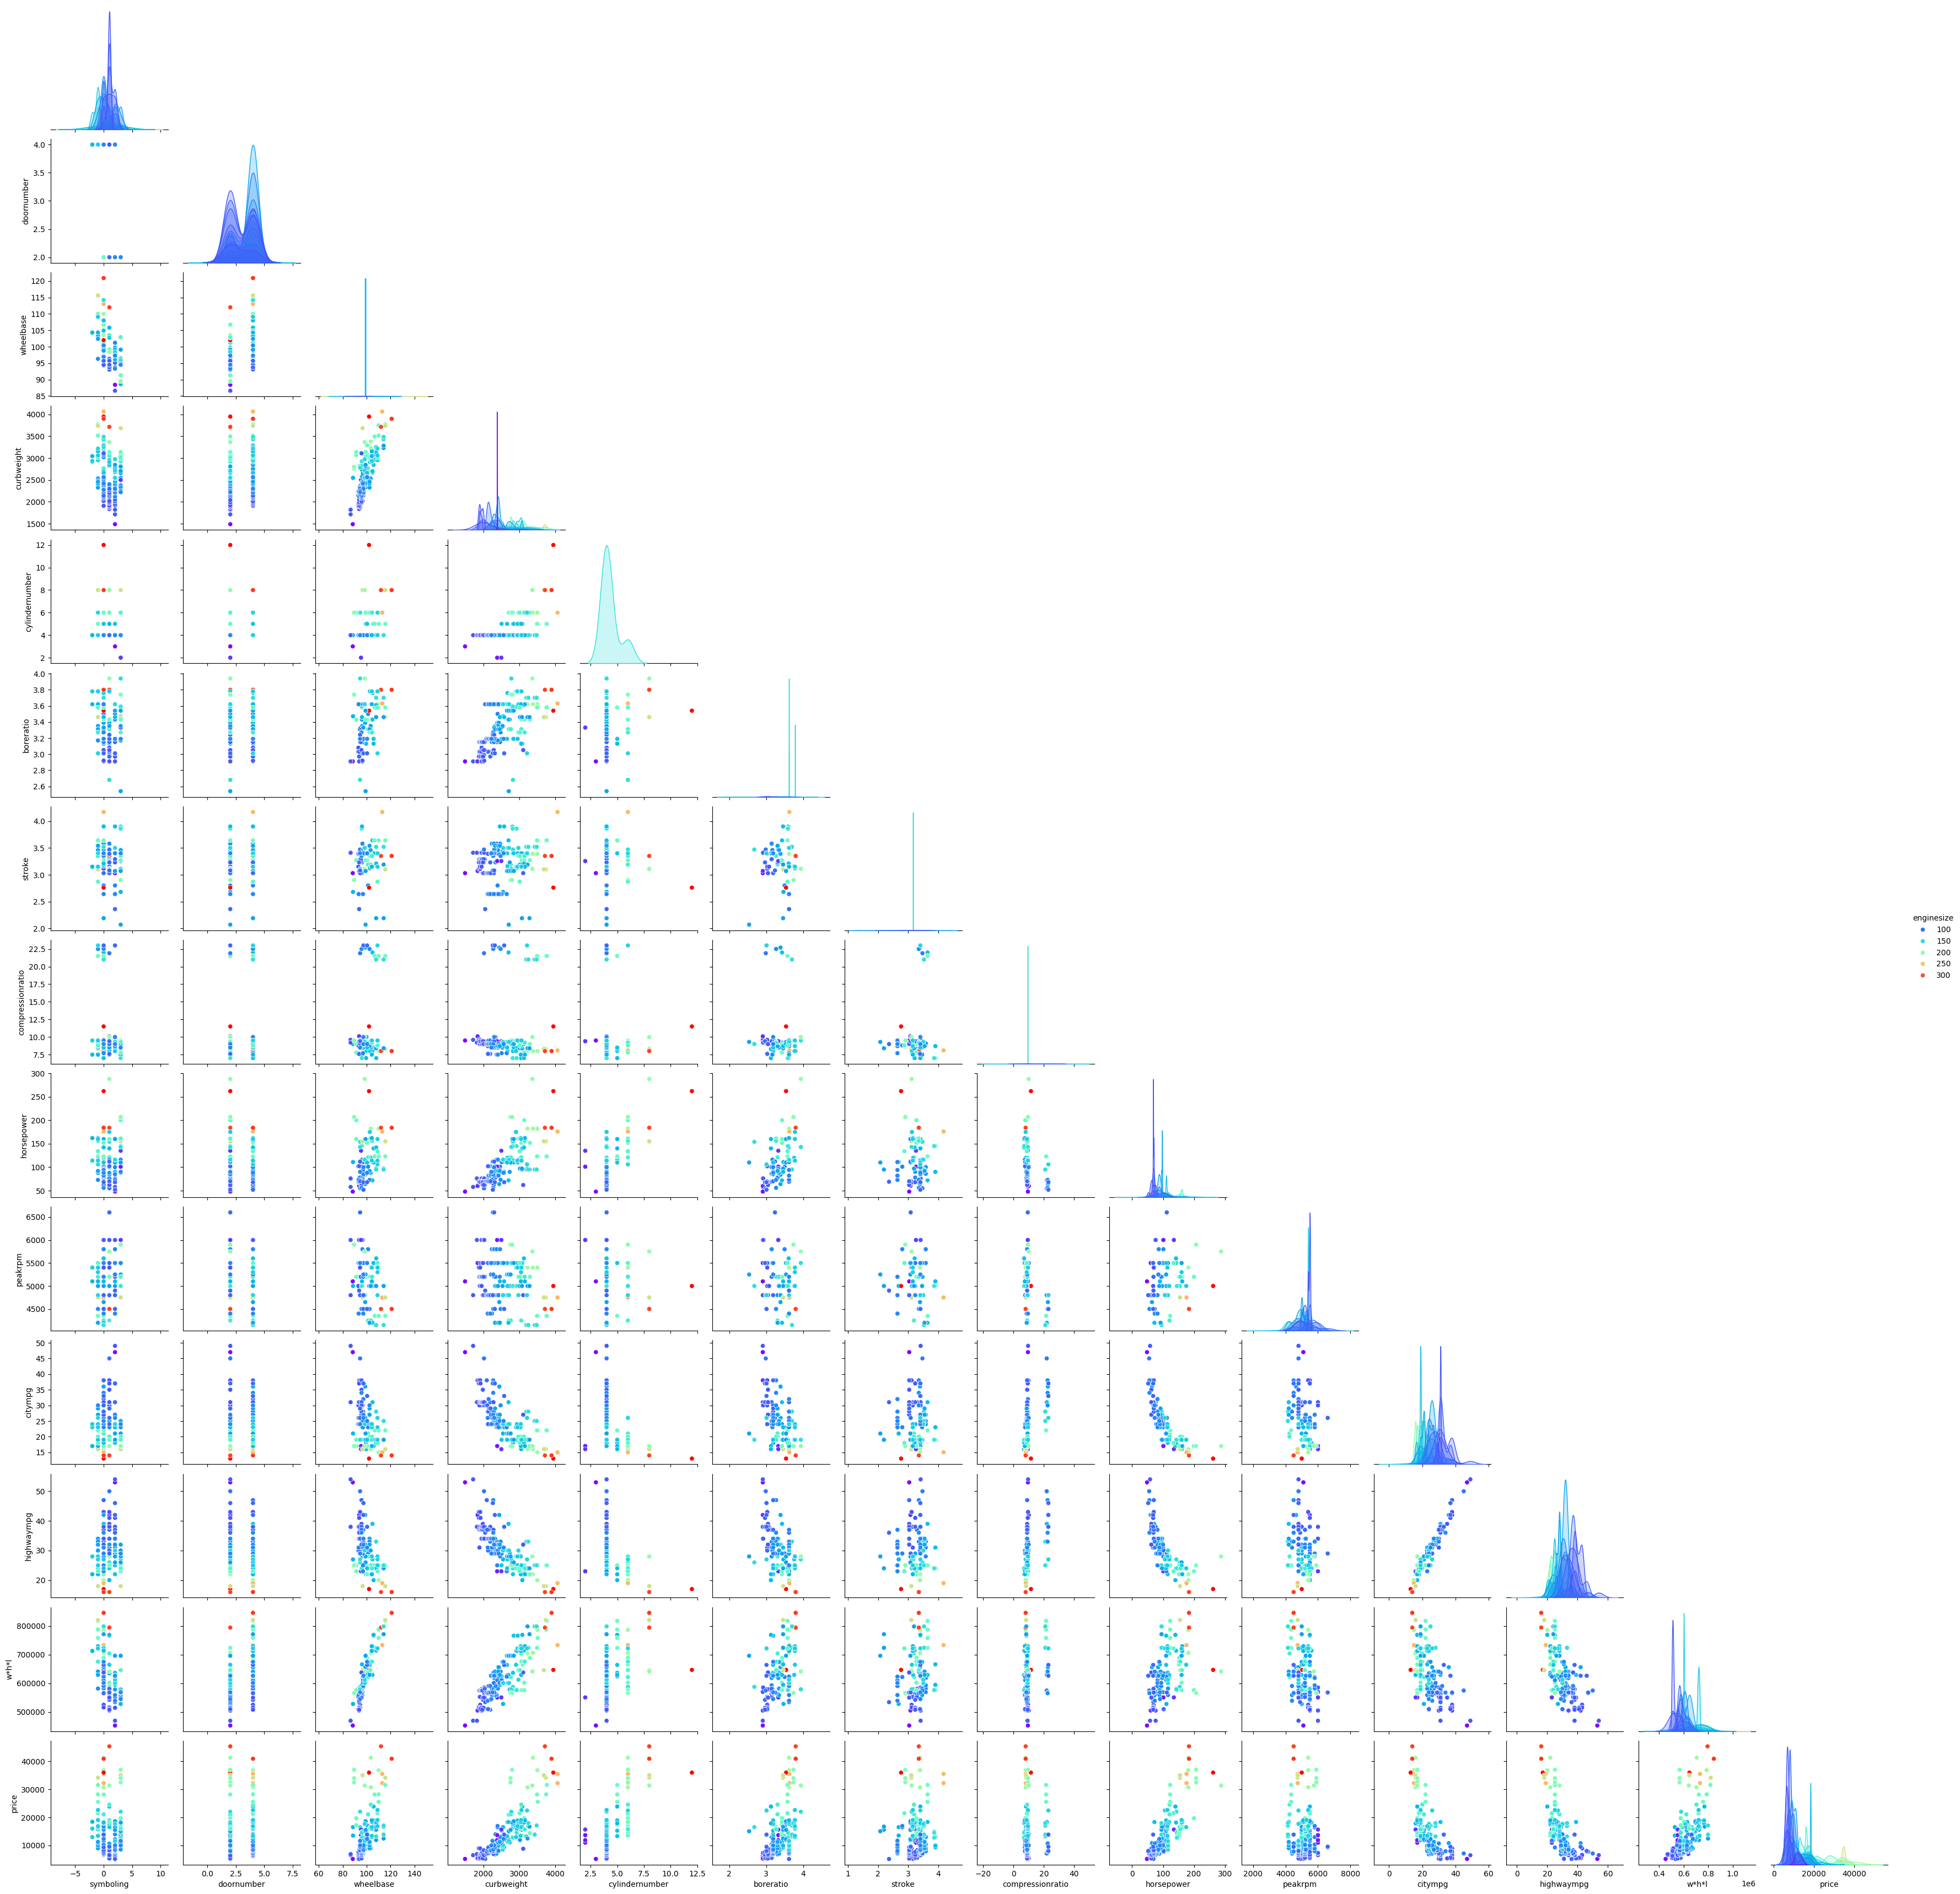

In [ ]:
sns.pairplot(new_full.select_dtypes(include=[np.number]), hue="enginesize", palette='rainbow',corner=True)

qeyd **citymp ve  highway mpg** yuksek korelyasiay var gelecekde pozacam birini

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
new_full.corr(numeric_only=True)
# .where(new_X.corr(numeric_only=True)<0)

symboling  doornumber  wheelbase  curbweight  \
symboling          1.000000   -0.664073  -0.531954   -0.227691   
doornumber        -0.664073    1.000000   0.447357    0.197379   
wheelbase         -0.531954    0.447357   1.000000    0.776386   
curbweight        -0.227691    0.197379   0.776386    1.000000   
cylindernumber    -0.113129   -0.016009   0.339507    0.609727   
enginesize        -0.105790    0.020742   0.569329    0.850594   
boreratio         -0.130051    0.119258   0.488750    0.648480   
stroke            -0.008735   -0.011082   0.160959    0.168790   
compressionratio  -0.178515    0.177888   0.249786    0.151362   
horsepower         0.070873   -0.126947   0.353294    0.750739   
peakrpm            0.273606   -0.247668  -0.360469   -0.266243   
citympg           -0.035823   -0.012417  -0.470414   -0.757414   
highwaympg         0.034606   -0.036330  -0.544082   -0.797465   
w*h*l             -0.456263    0.473442   0.913669    0.819806   
price             -0.079978    0.031835   0.577816    0.835305   

                  cylindernumber  enginesize  boreratio    stroke  \
symboling              -0.113129   -0.105790  -0.130051 -0.008735   
doornumber             -0.016009    0.020742   0.119258 -0.011082   
wheelbase               0.339507    0.569329   0.488750  0.160959   
curbweight              0.609727    0.850594   0.648480  0.168790   
cylindernumber          1.000000    0.846031   0.231399  0.008210   
enginesize              0.846031    1.000000   0.583774  0.203129   
boreratio               0.231399    0.583774   1.000000 -0.055909   
stroke                  0.008210    0.203129  -0.055909  1.000000   
compressionratio       -0.020002    0.028971   0.005197  0.186110   
horsepower              0.692016    0.809769   0.573677  0.080940   
peakrpm                -0.124172   -0.244660  -0.254976 -0.067964   
citympg                -0.445837   -0.653658  -0.584532 -0.042145   
highwaympg             -0.466666   -0.677470  -0.587012 -0.043931   
w*h*l                   0.373232    0.594351   0.538588  0.099355   
price                   0.718305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
doornumber                0.177888   -0.126947 -0.247668 -0.012417   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
cylindernumber           -0.020002    0.692016 -0.124172 -0.445837   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
w*h*l                     0.233301    0.428573 -0.330108 -0.550292   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     w*h*l     price  
symboling           0.034606 -0.456263 -0.079978  
doornumber         -0.036330  0.473442  0.031835  
wheelbase          -0.544082  0.913669  0.577816  
curbweight         -0.797465  0.819806  0.835305  
cylindernumber     -0.466666  0.373232  0.718305  
enginesize         -0.677470  0.594351  0.874145  
boreratio          -0.587012  0.538588  0.553173  
stroke             -0.043931  0.099355  0.079443  
compressionratio    0.265201  0.233301  0.067984  
horsepower         -0.770544  0.428573  0.808139  
peakrpm            -0.054275 -0.330108 -0.085267  
citympg             0.971337 -0.550292 -0.685751  
highwaympg          1.000000 -0.602410 -0.697599  
w*h*l              -0

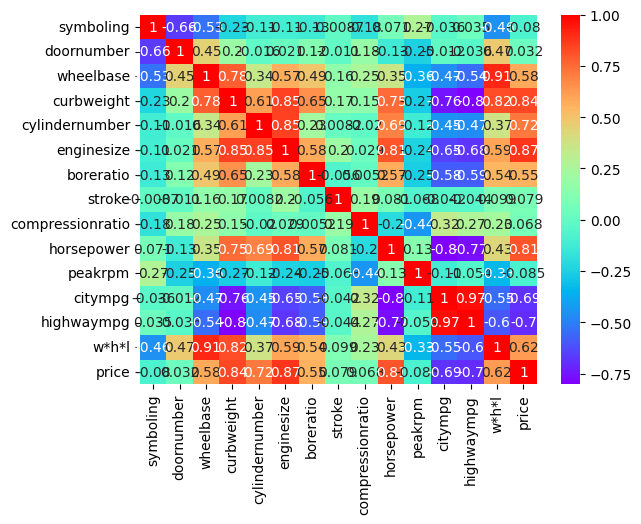

In [ ]:
dataplot = sns.heatmap(new_full.corr(numeric_only=True), cmap="rainbow", annot=True)

In [ ]:
new_full_cat_col

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_brand'],
      dtype='object')

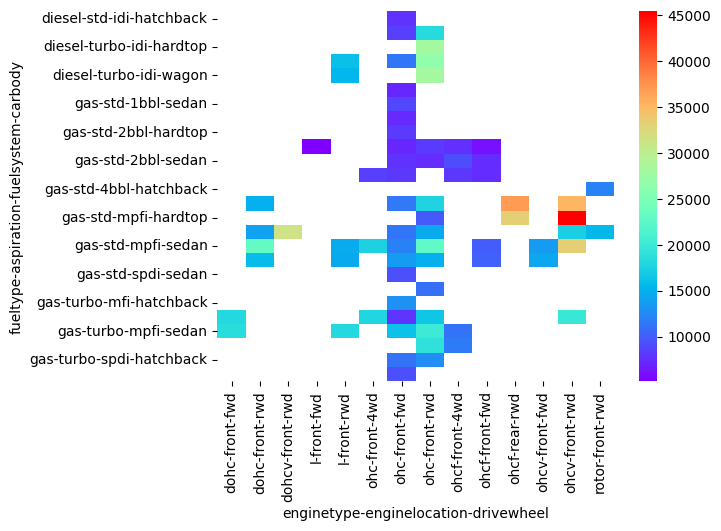

In [ ]:
table1 = pd.pivot_table(new_full, values="price", columns=['enginetype','enginelocation','drivewheel'], index=['fueltype','aspiration','fuelsystem','carbody'],
                       aggfunc='mean')
sns.heatmap(table1, cmap='rainbow');

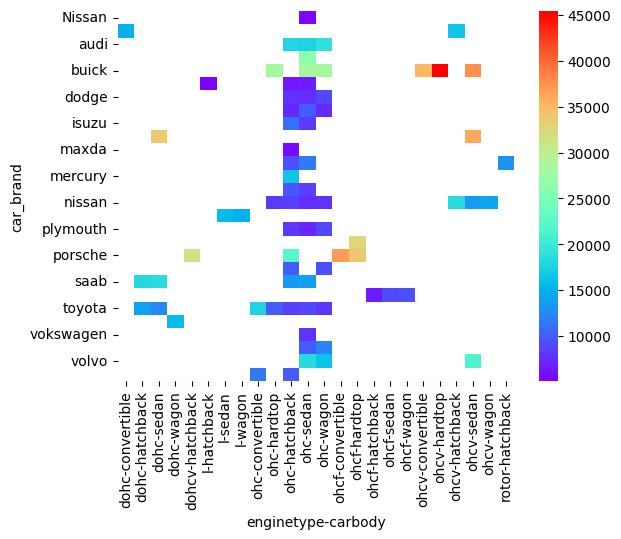

In [ ]:
table2 = pd.pivot_table(new_full_cat, values="price", columns=['enginetype','carbody'], index=['car_brand'],
                       aggfunc='mean')
sns.heatmap(table2, cmap='rainbow');

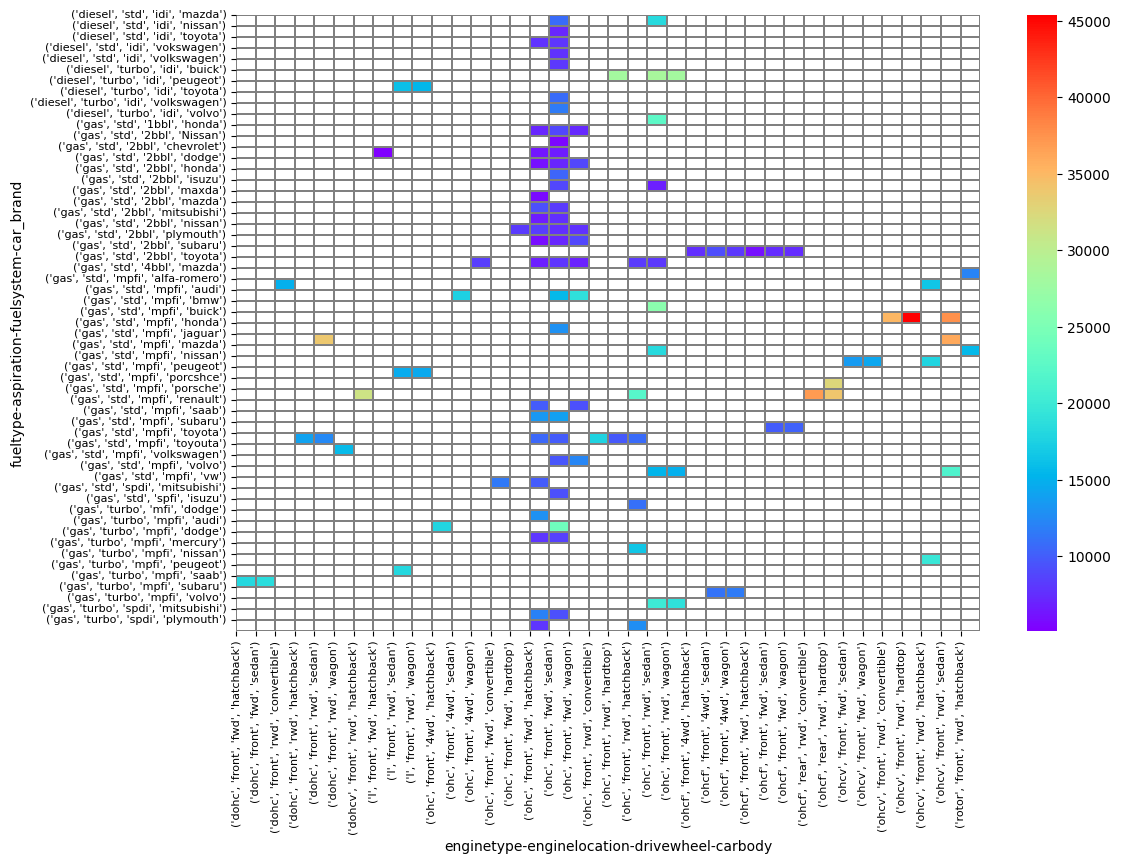

In [ ]:
table3 = pd.pivot_table(new_full_cat, values="price", columns=['enginetype','enginelocation','drivewheel','carbody'], index=['fueltype','aspiration','fuelsystem','car_brand'],
                       aggfunc='mean')
plt.figure(figsize=(12, 8))
ax=sns.heatmap(table3, cmap='rainbow',linewidths=0.2, linecolor='grey')
ax.set_yticks(range(len(table3.index)))
ax.set_yticklabels(table3.index, rotation=0, fontsize=8)

ax.set_xticks(range(len(table3.columns)))
ax.set_xticklabels(table3.columns, rotation=90, fontsize=8)

plt.show();


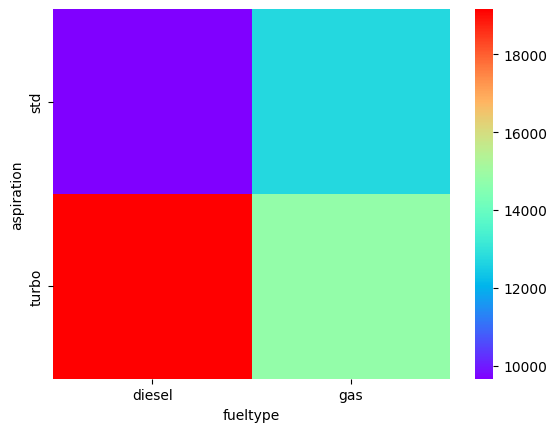

In [ ]:
table4 = pd.pivot_table(new_full, values="price", columns=['fueltype'], index=['aspiration'],
                       aggfunc='mean')
sns.heatmap(table4, cmap='rainbow');

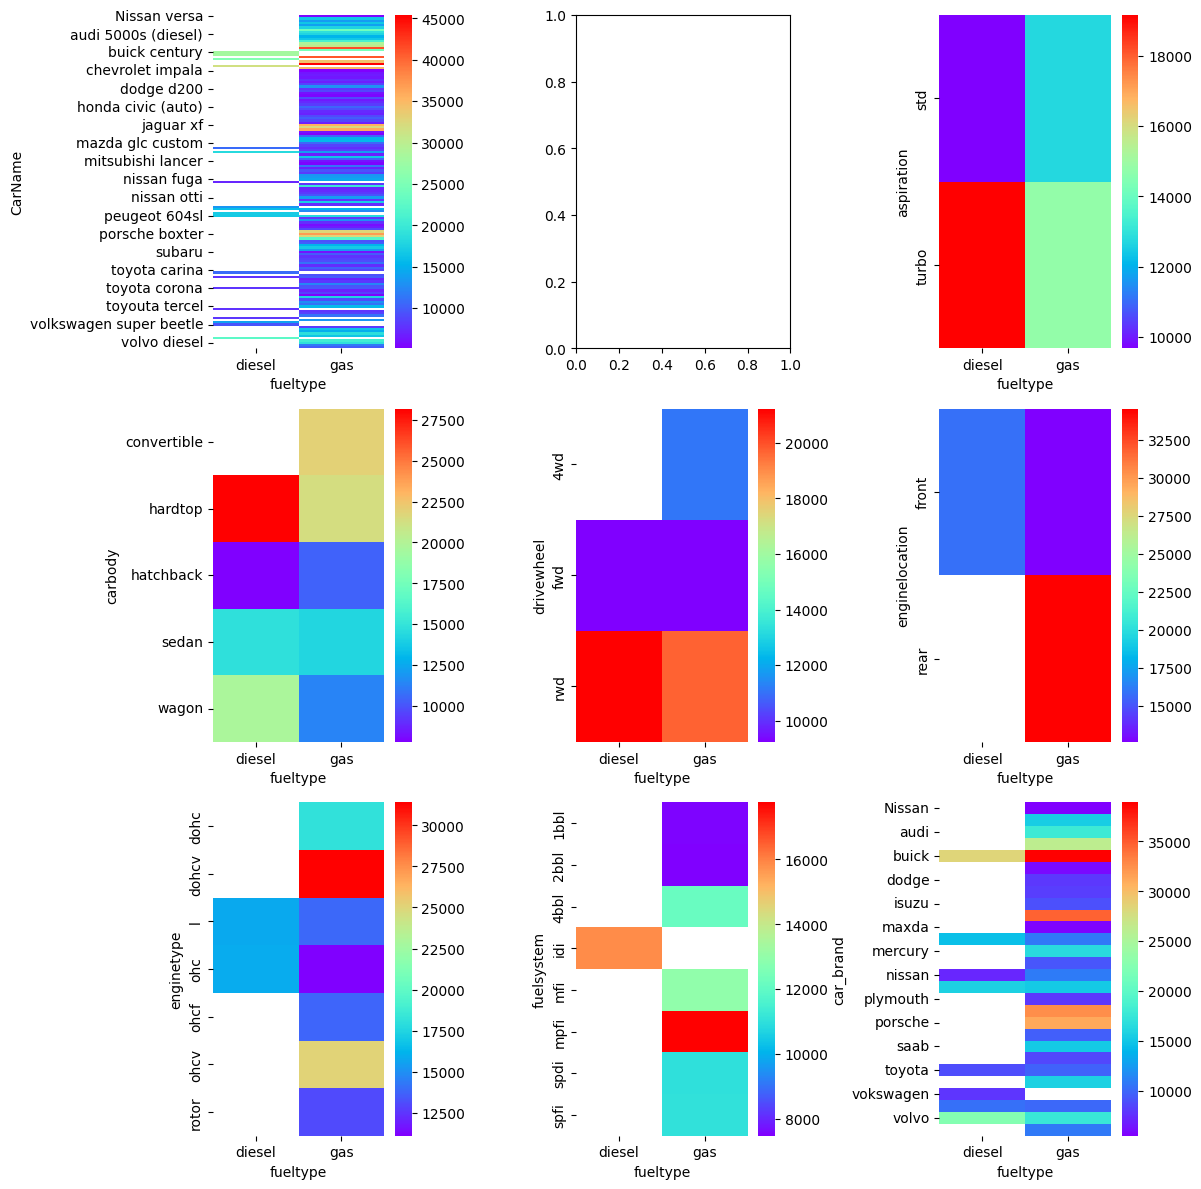

In [ ]:
row=int(np.ceil(len(new_full_cat.select_dtypes(exclude=[np.number]).columns)/3))
figure,ax=plt.subplots(row,3,figsize=(4*row,12))

for i,col in enumerate(new_full_cat.select_dtypes(exclude=[np.number]).columns):
    rows,columns=divmod(i,3)
    if col=='fueltype':
        continue
    tables = pd.pivot_table(new_full_cat, values="price", columns=['fueltype'], index=[col],
                       aggfunc='mean')
    sns.heatmap(tables, cmap='rainbow',ax=ax[rows, columns])
plt.tight_layout()
plt.show()

In [ ]:
# Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
#        'enginetype', 'fuelsystem', 'car_brand'],
#       dtype='object')

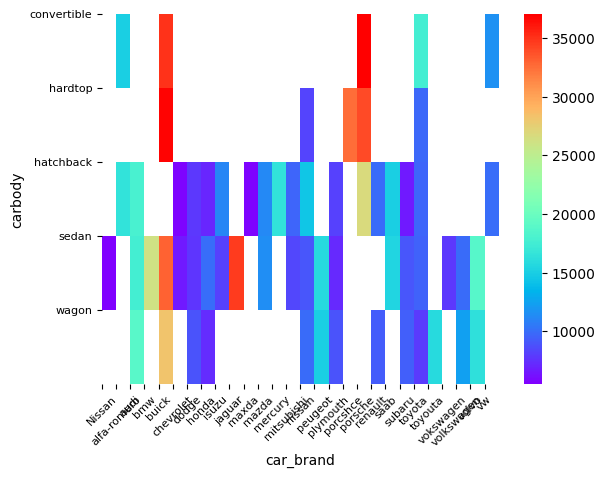

In [ ]:
table5 = pd.pivot_table(new_full_cat, values="price", columns=['car_brand'], index=['carbody'],
                       aggfunc='mean')
ax=sns.heatmap(table5, cmap='rainbow')
ax.set_yticks(range(len(table5.index)))
ax.set_yticklabels(table5.index, rotation=0, fontsize=8)

ax.set_xticks(range(len(table5.columns)))
ax.set_xticklabels(table5.columns, rotation=45, fontsize=8)

plt.show();

In [ ]:
# new_X.drop('w*h*l', axis=1).select_dtypes(include=[np.number]).boxplot()
# plt.xticks(rotations=90)

In [ ]:
# def split_car_name(df, index=0):
#     return df.str.split().str[index]


In [ ]:
# new_X['CarName'].apply(split_car_name)

In [ ]:
# new_X['CarName'].value_counts()

In [ ]:
# new_X['CarName'].value_counts()

In [ ]:
# carnames=new_X['CarName'].str.split(' ').str[0].value_counts().sort_index()

In [ ]:
# mapping={
#     'toyouta':'toyota',
#     'vw':'volkswagen',
#     'porcshce':'porsche',
#     'maxda':'mazda',
#     'Nissan':'nissan'
# }

In [ ]:

# carnames=carnames.map(mapping).fillna(carnames)

# outliers

### visual

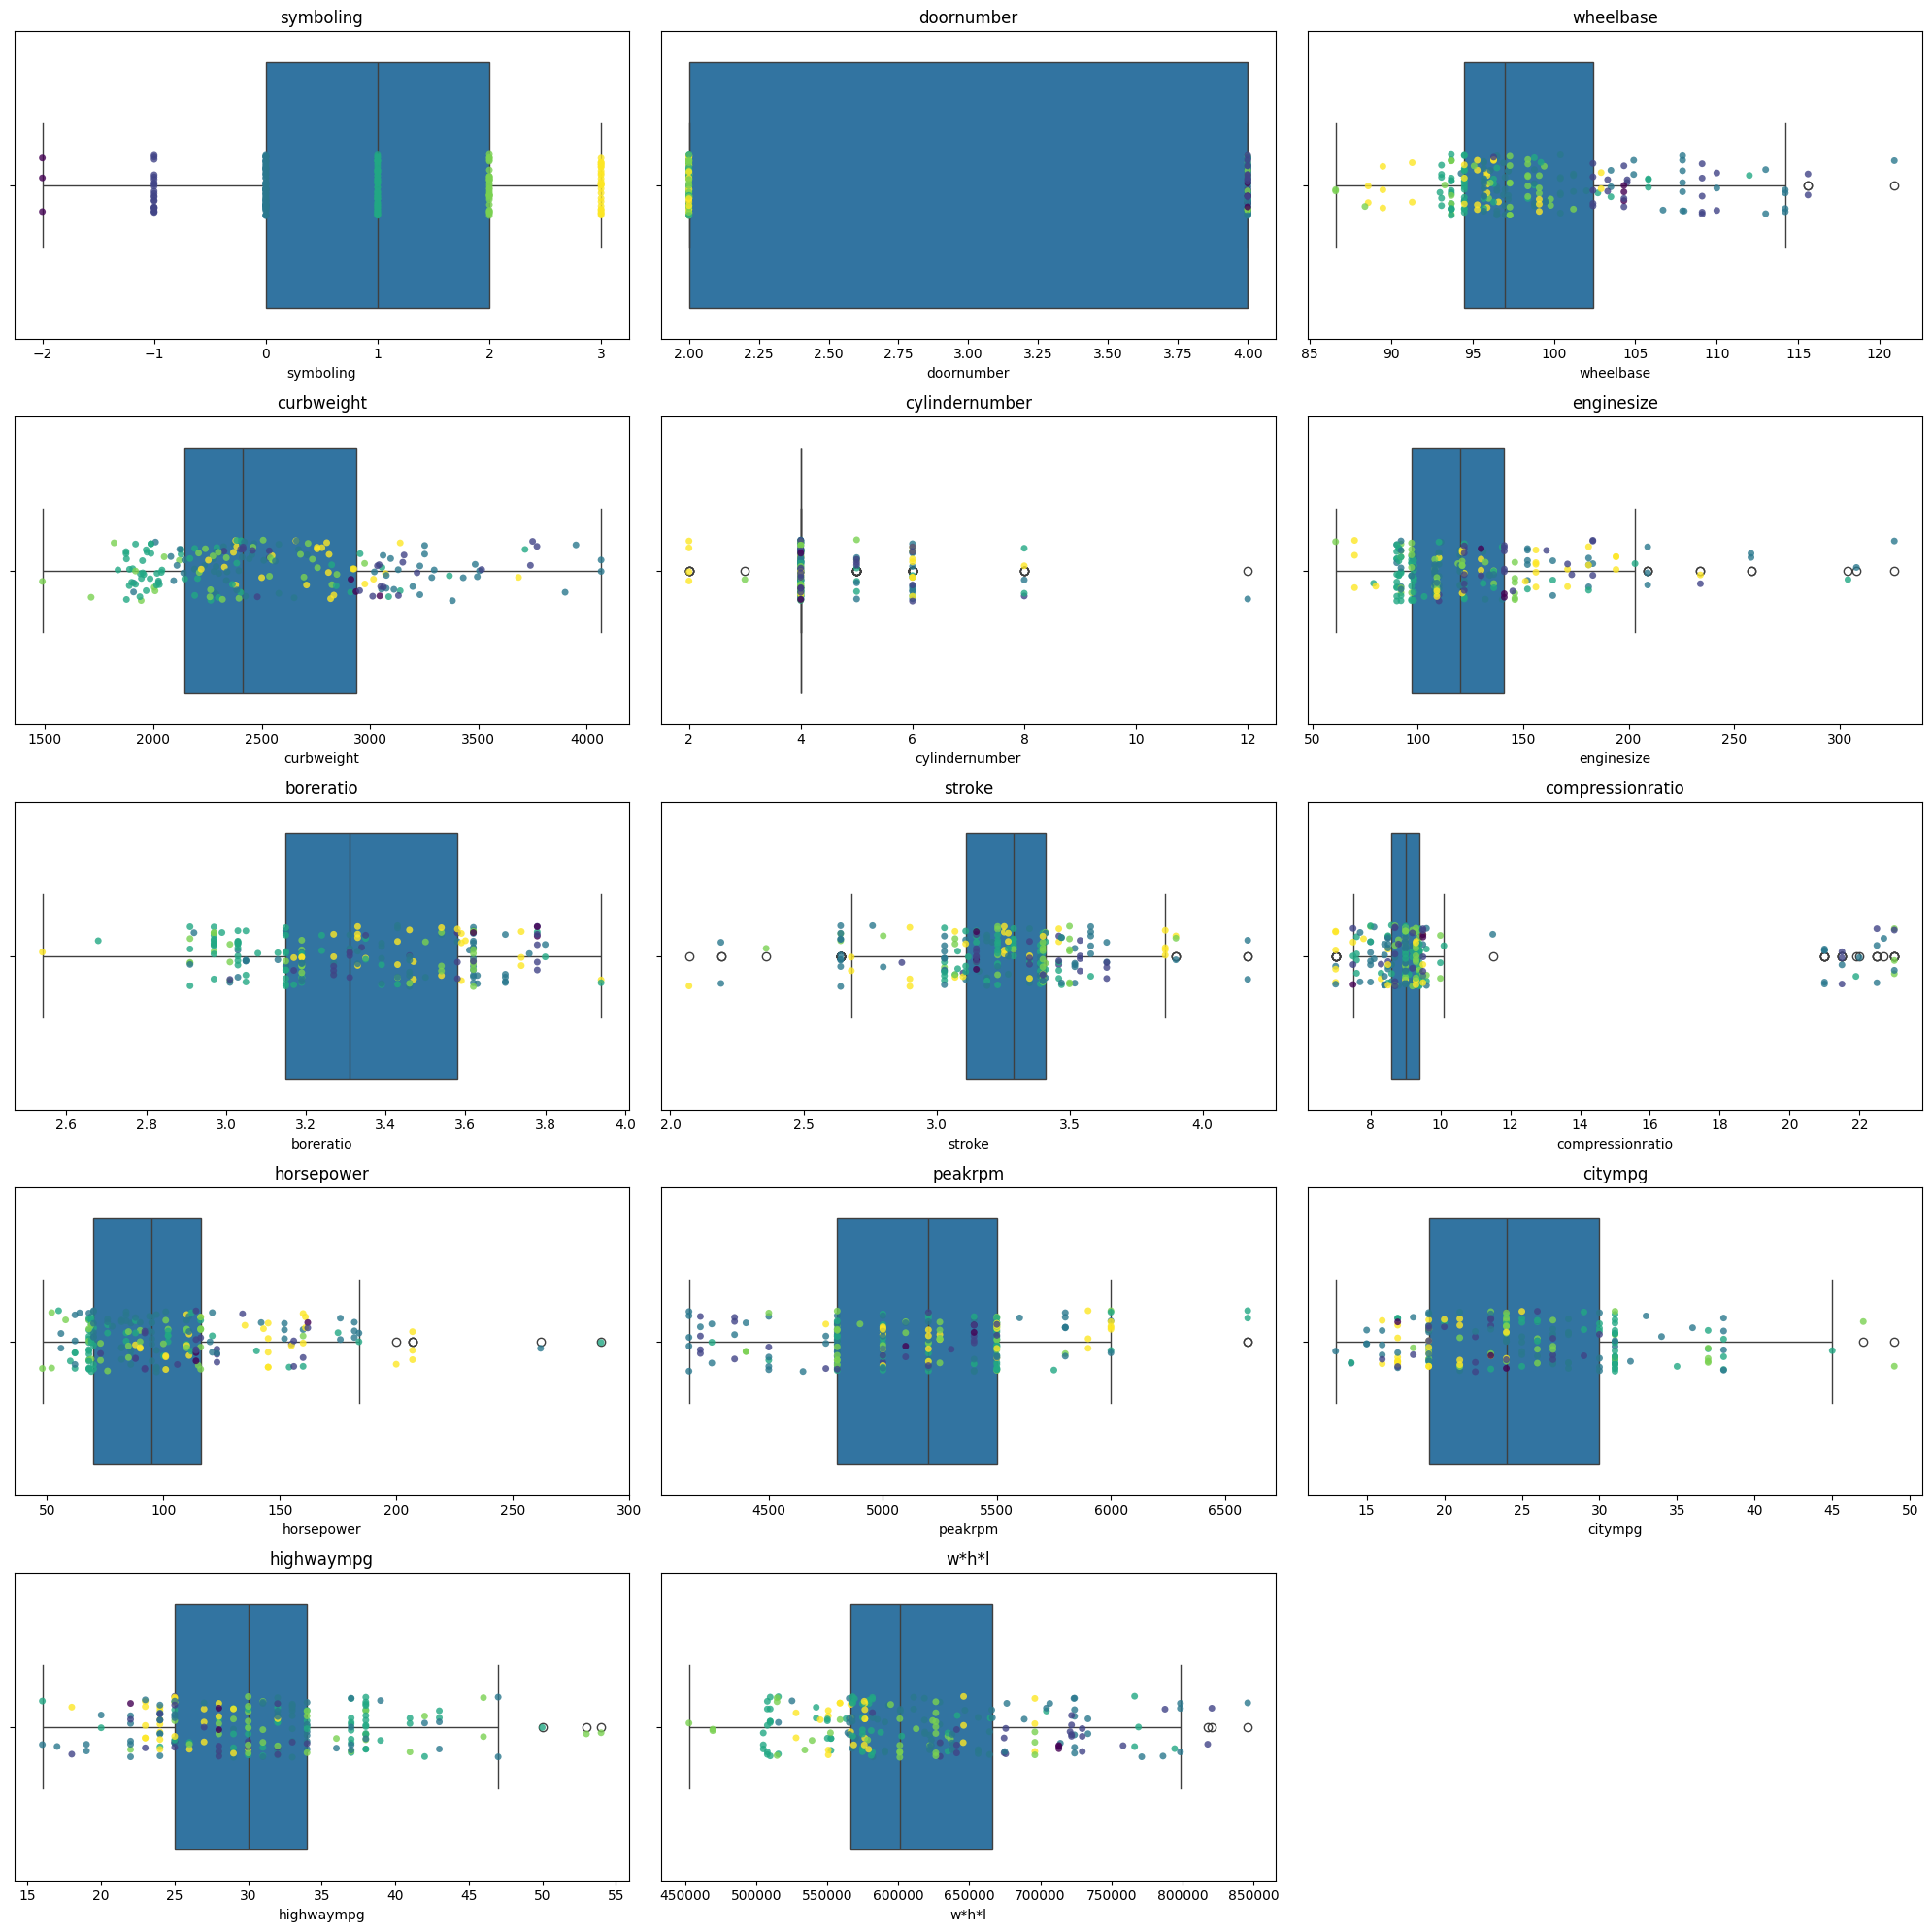

In [ ]:
numeric_cols = new_X.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_cols)

# Şəkil ölçüsünü təyin edirik
plt.figure(figsize=(20, 20))

# Subplot-ların sayını təyin edirik (hər sətirdə 3 qrafik olacaq)
rows = int(np.ceil(num_cols / 3))

# Qrafikləri tək-tək əlavə edirik
for index, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, index+1)
    sns.boxplot()
    sns.boxplot(data=new_full, x=new_full[col])
    sns.stripplot(data=new_full, x=new_full[col], c=new_full['symboling'], alpha=0.8)
    plt.title(col)


plt.tight_layout()
plt.show()

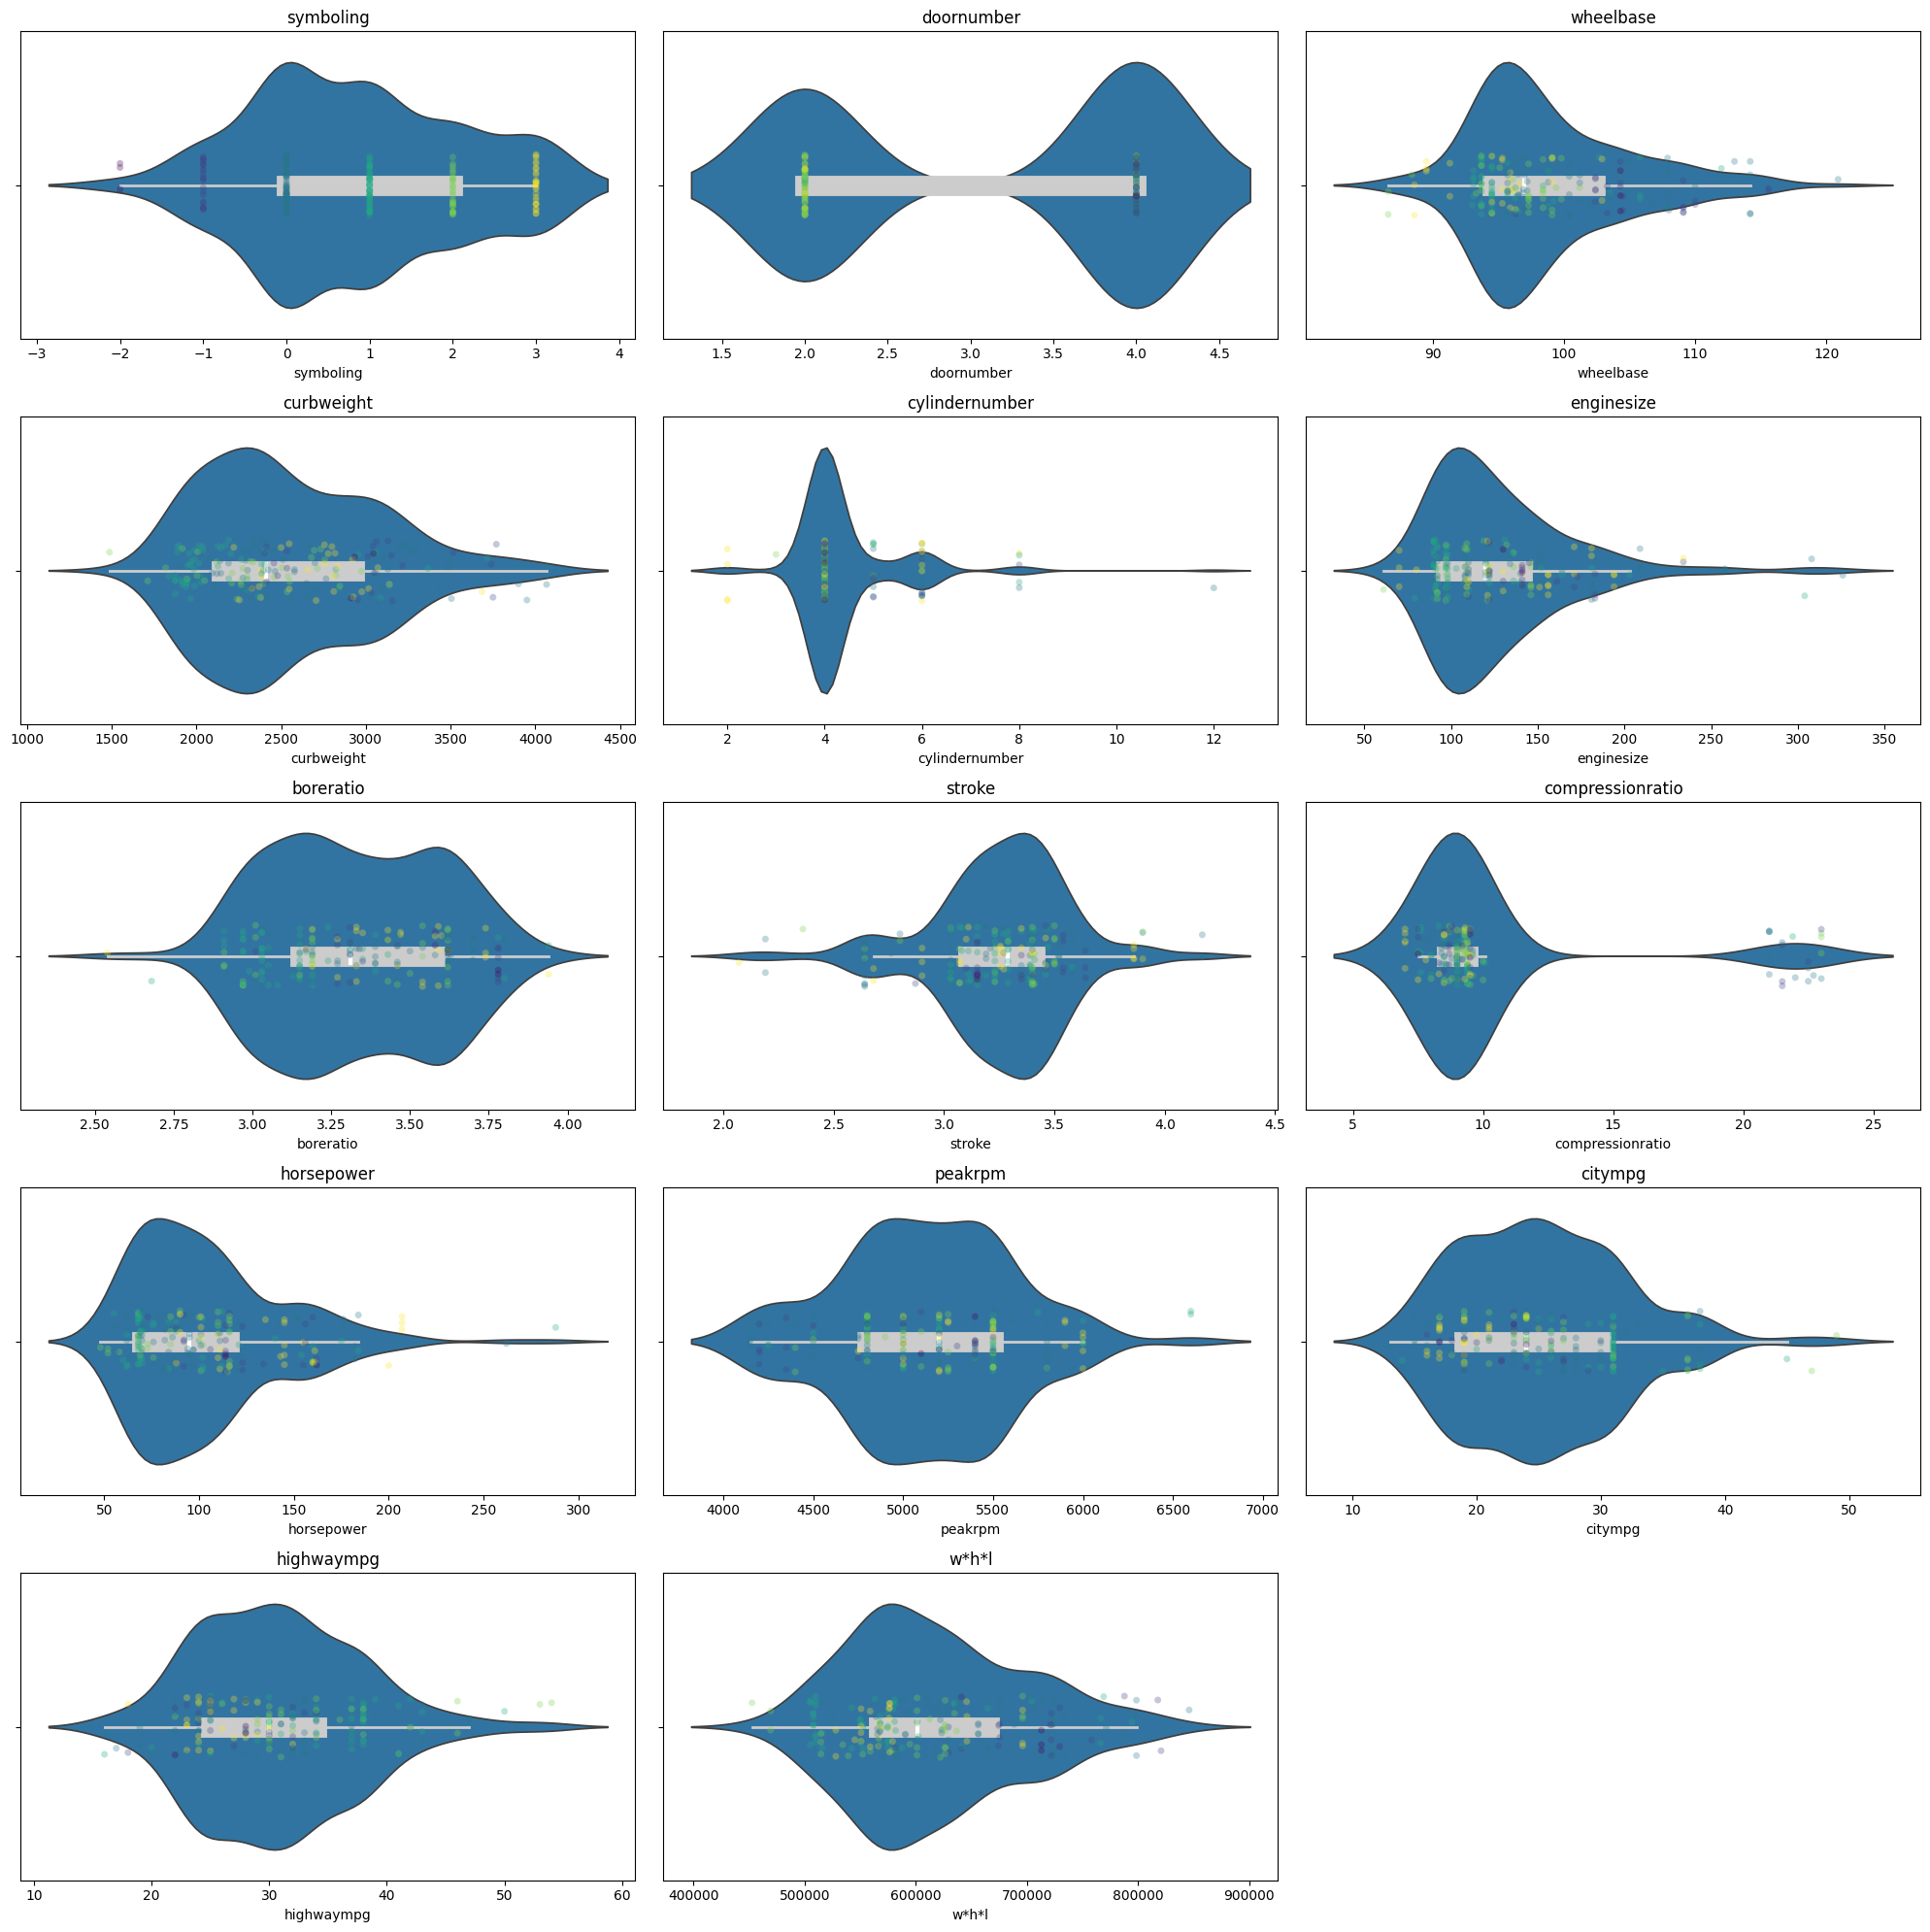

In [ ]:
numeric_cols = new_X.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_cols)

# Şəkil ölçüsünü təyin edirik
plt.figure(figsize=(20, 20))

# Subplot-ların sayını təyin edirik (hər sətirdə 3 qrafik olacaq)
rows = int(np.ceil(num_cols / 3))

# Qrafikləri tək-tək əlavə edirik
for index, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, index+1)
    sns.boxplot()
    sns.violinplot(data=new_X, x=new_X[col], inner_kws=dict(box_width=15, whis_width=2, color=".8"))
    sns.stripplot(data=new_X, x=new_X[col], c=new_X['symboling'], alpha=0.3)
    plt.title(col)


plt.tight_layout()
plt.show()

###Dealing with outliers

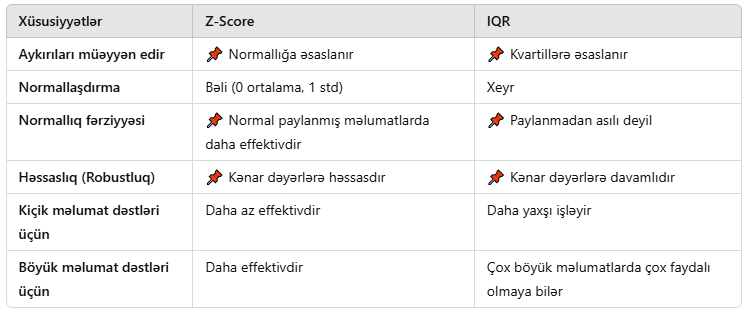

In [ ]:
c

kurtosis      skew
symboling         -0.689015  0.209525
doornumber        -1.939614 -0.245737
wheelbase          0.963276  1.042514
curbweight        -0.070942  0.676402
cylindernumber    13.353508  2.796801
enginesize         5.148030  1.933375
boreratio         -0.795151  0.020009
stroke             2.092597 -0.684648
compressionratio   5.077161  2.591720
horsepower         2.589862  1.395006
peakrpm            0.055528  0.074608
citympg            0.535505  0.658838
highwaympg         0.400284  0.536038
w*h*l             -0.223649  0.562080
price              2.948598  1.764644

In [ ]:
kurtosis_skew_explanantion

kurtosis        skew
symboling         outlier_olma_ehtimali_ashaqi   simmetrik
doornumber        outlier_olma_ehtimali_ashaqi   simmetrik
wheelbase         outlier_olma_ehtimali_ashaqi    cox_meyl
curbweight        outlier_olma_ehtimali_ashaqi  biraz_meyl
cylindernumber                  outlierler_var    cox_meyl
enginesize                      outlierler_var    cox_meyl
boreratio         outlier_olma_ehtimali_ashaqi   simmetrik
stroke            outlier_olma_ehtimali_ashaqi  biraz_meyl
compressionratio                outlierler_var    cox_meyl
horsepower        outlier_olma_ehtimali_ashaqi    cox_meyl
peakrpm           outlier_olma_ehtimali_ashaqi   simmetrik
citympg           outlier_olma_ehtimali_ashaqi  biraz_meyl
highwaympg        outlier_olma_ehtimali_ashaqi  biraz_meyl
w*h*l             outlier_olma_ehtimali_ashaqi  biraz_meyl
price             outlier_olma_ehtimali_ashaqi    cox_meyl

In [ ]:
new_full = pd.concat([new_X, y], axis=1)
new_full_num=new_full.select_dtypes(include=[np.number])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(new_X, y, test_size=0.15, random_state=42)

In [ ]:
# capping 'compressionratio	'- outliers
cout=Outliered(X_train ,'compressionratio')
cout.capp(inplace=True)

120     9.4
154     9.0
202     8.8
79      7.6
69     10.6
       ... 
106     9.0
14      9.0
92      9.4
179     9.3
102     9.0
Name: compressionratio, Length: 174, dtype: float64

In [ ]:
print(f'before outliers:{Outliered(cout.restore_data(),"compressionratio").outliers()}\nafter this process outliers:{cout.outliers()}' )

before outliers:[[21.5  7.  22.  21.   7.  21.9 22.5  7.   7.  21.  23.  23.  23.  21.5
  23.  21.  22.5 11.5 21.   7.  22.7 21. ]]
after this process outliers:[]


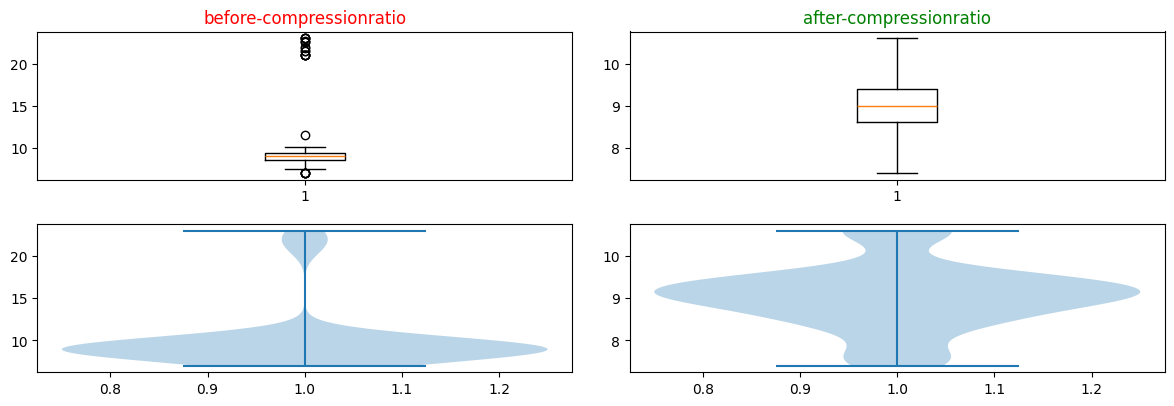

In [ ]:
fig, axes= plt.subplots(2,2, figsize=(12,4))
plt.tight_layout()

axes[0,0].boxplot(cout.restore_data()[['compressionratio']])
axes[0,0].set_title('before-compressionratio', c='r')
axes[0,1].boxplot(X_train['compressionratio'])
axes[0,1].set_title('after-compressionratio', c='g')
axes[1,0].violinplot(cout.restore_data()[['compressionratio']])

axes[1,1].violinplot(X_train['compressionratio'])

plt.show()


In [ ]:
#'engine size' price tesir edir bu sebebden outlierleri pozmaqdan ve cap etmekden qorxuram, belke log ederem amma capp yox
eout=Outliered(X_train, 'enginesize')
eout.outliers(),eout.low_lim, eout.up_lim

(array([[258, 326, 209, 234, 258, 304, 234]]),
 np.float64(31.625),
 np.float64(206.625))

# Last notes before preprocessing

<Axes: >

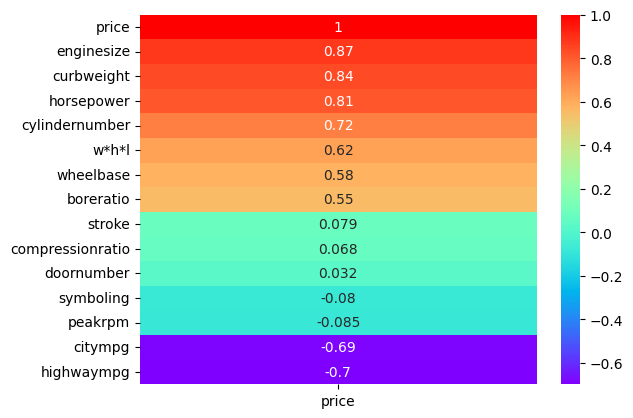

In [ ]:
sns.heatmap(new_full.corr(numeric_only=True)[['price']].sort_values(by=['price'],ascending=False), cmap="rainbow", annot=True)

In [ ]:
high_cor=new_full.corr(numeric_only=True)[['price']].loc[abs(new_full.corr(numeric_only=True)['price'])>0.5].sort_values(by=['price'], ascending=False).drop(['price'])

In [ ]:
high_cor_col_indexes=high_cor.index

In [ ]:
X_train__cat_col=X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
all_cols_with_high_cor=high_cor_col_indexes.union(X_train__cat_col)

In [ ]:
all_cols_with_high_cor

Index(['CarName', 'aspiration', 'boreratio', 'carbody', 'citympg',
       'curbweight', 'cylindernumber', 'drivewheel', 'enginelocation',
       'enginesize', 'enginetype', 'fuelsystem', 'fueltype', 'highwaympg',
       'horsepower', 'w*h*l', 'wheelbase'],
      dtype='object')

In [ ]:
#bunlari yoxlayacam
X_train_only_high_cor=X_train[all_cols_with_high_cor]
X_test_only_high_cor=X_test[all_cols_with_high_cor]
X_train_only_high_cor

CarName aspiration  boreratio    carbody  citympg  \
120         plymouth fury iii        std       2.97  hatchback       31   
154  toyota corolla 1600 (sw)        std       3.05      wagon       27   
202               volvo 244dl        std       3.58      sedan       18   
79              mitsubishi g4      turbo       3.03  hatchback       24   
69              buick century      turbo       3.58    hardtop       22   
..                        ...        ...        ...        ...      ...   
106            nissan clipper        std       3.43  hatchback       19   
14                     bmw z4        std       3.31      sedan       20   
92               nissan latio        std       3.15      sedan       31   
179             toyota corona        std       3.27  hatchback       19   
102               nissan fuga        std       3.43      wagon       17   

     curbweight  cylindernumber drivewheel enginelocation  enginesize  \
120        1967               4        fwd          front          90   
154        2290               4        4wd          front          92   
202        3012               6        rwd          front         173   
79         2145               4        fwd          front          98   
69         3495               5        rwd          front         183   
..          ...             ...        ...            ...         ...   
106        3139               6        rwd          front         181   
14         3055               6        rwd          front         164   
92         1938               4        fwd          front          97   
179        3016               6        rwd          front         171   
102        3296               6        fwd          front         181   

    enginetype fuelsystem fueltype  highwaympg  horsepower       w*h*l  \
120        ohc       2bbl      gas          38          68  507808.444   
154        ohc       2bbl      gas          32          62  637861.572   
202       ohcv       mpfi      gas          23         134  721961.760   
79         ohc       spdi      gas          30         102  509815.592   
69         ohc        idi   diesel          25         123  723650.625   
..         ...        ...      ...         ...         ...         ...   
106       ohcv       mpfi      gas          25         160  602371.455   
14         ohc       mpfi      gas          25         121  704276.370   
92         ohc       2bbl      gas          37          69  574764.630   
179       dohc       mpfi      gas          24         161  645993.400   
102       ohcv       mpfi      gas          22         152  688677.990   

     wheelbase  
120       93.7  
154       95.7  
202      109.1  
79        93.0  
69       106.7  
..         ...  
106       99.2  
14       103.5  
92        94.5  
179      102.9  
102      100.4  

[174 rows x 17 columns]

yoxlayacam:

X_train_only_high_cor

X_test_only_high_cor


---


without high_cor

X_train

X_test


---


Cgalishacam Function transformer ile columlardan w * l * h edim  , bunu uchun
yeni

X_train_0,

X_test_0, edim

outlierleri trainde silim
function  transformer duzeldim





#Preprocessing

### columns defining

In [ ]:
kurtosis_skew_explanantion

kurtosis        skew
symboling         outlier_olma_ehtimali_ashaqi   simmetrik
doornumber        outlier_olma_ehtimali_ashaqi   simmetrik
wheelbase         outlier_olma_ehtimali_ashaqi    cox_meyl
curbweight        outlier_olma_ehtimali_ashaqi  biraz_meyl
cylindernumber                  outlierler_var    cox_meyl
enginesize                      outlierler_var    cox_meyl
boreratio         outlier_olma_ehtimali_ashaqi   simmetrik
stroke            outlier_olma_ehtimali_ashaqi  biraz_meyl
compressionratio                outlierler_var    cox_meyl
horsepower        outlier_olma_ehtimali_ashaqi    cox_meyl
peakrpm           outlier_olma_ehtimali_ashaqi   simmetrik
citympg           outlier_olma_ehtimali_ashaqi  biraz_meyl
highwaympg        outlier_olma_ehtimali_ashaqi  biraz_meyl
w*h*l             outlier_olma_ehtimali_ashaqi  biraz_meyl
price             outlier_olma_ehtimali_ashaqi    cox_meyl

In [ ]:
X_train_log_col=['cylindernumber','enginesize','wheelbase','horsepower']

In [ ]:
X_train_num=X_train.drop(X_train_log_col, axis=1).select_dtypes(include=[np.number])
X_train_num_col=X_train_num.columns
X_train_num_col

Index(['symboling', 'doornumber', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'w*h*l'],
      dtype='object')

In [ ]:
X_train_target_encoder_col=['CarName']
X_train_cat=X_train.drop(X_train_target_encoder_col, axis=1).select_dtypes(exclude=[np.number])
X_train_cat_col=X_train_cat.columns
X_train_cat_col


Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem'],
      dtype='object')

### pipeline func

In [ ]:
def transform_poly_pipe(X_cat_cols,X_num_cols,X_log_cols,t_e_col,poly=False,poly_degree=1):
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler())

    log_pipeline=make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
        StandardScaler())

    cat_pipeline=make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore'))

    target_encoder_pipeline=make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        TargetEncoder())


    if poly:
        num_pipeline.steps.append(('polynomial', PolynomialFeatures(poly_degree)))

    full_pipeline = Pipeline([
        ('preprocessing', ColumnTransformer([
            ('cat', cat_pipeline, X_cat_cols),
            ('num', num_pipeline, X_num_cols),
            ('log', log_pipeline, X_log_cols),
            ('target_e',target_encoder_pipeline, t_e_col )
        ], remainder='passthrough'))
    ])
    return full_pipeline

In [ ]:
def no_scale_transform_poly_pipe(X_cat_cols,X_num_cols,X_log_cols,t_e_col,poly=False,poly_degree=1):
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        # StandardScaler()
        )

    log_pipeline=make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
        # StandardScaler()
        )

    cat_pipeline=make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore'))

    target_encoder_pipeline=make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        TargetEncoder())


    if poly:
        num_pipeline.steps.append(('polynomial', PolynomialFeatures(poly_degree)))

    full_pipeline = Pipeline([
        ('preprocessing', ColumnTransformer([
            ('cat', cat_pipeline, X_cat_cols),
            ('num', num_pipeline, X_num_cols),
            ('log', log_pipeline, X_log_cols),
            ('target_e',target_encoder_pipeline, t_e_col )
        ], remainder='passthrough'))
    ])
    return full_pipeline

In [ ]:
#hem log elesin hem de istesek pollynomial featurlerde etsin
def log_transform_poly_pipe(X_cat_cols,X_num_cols,X_log_cols,poly=False,poly_degree=1):
    num_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        StandardScaler()
        )

    log_pipeline=make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
        StandardScaler()
        )

    cat_pipeline=make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown='ignore'))

    # target_encoder_pipeline=make_pipeline(
    #     SimpleImputer(strategy='most_frequent'),
    #     TargetEncoder())


    if poly:
        num_pipeline.steps.append(('polynomial', PolynomialFeatures(poly_degree)))

    full_pipeline = Pipeline([
        ('preprocessing', ColumnTransformer([
            ('cat', cat_pipeline, X_cat_cols),
            ('num', num_pipeline, X_num_cols),
            ('log', log_pipeline, X_log_cols)
        ], remainder='passthrough'))
    ])
    return full_pipeline

#Models

##X_train

###without standardScaling

In [ ]:
#without StandardScaling
interest=LinearRegression()

interesting=Pipeline([
    ('transform',no_scale_transform_poly_pipe(X_train_cat_col,X_train_num_col,X_train_log_col,X_train_target_encoder_col,poly=False,poly_degree=1)),
     ('estimator', interest)
])

interesting.fit(X_train, y_train)

wow=interesting.named_steps['estimator'].coef_
what=interesting.named_steps['transform'].get_feature_names_out()
print(pd.DataFrame(wow, what ).sort_values(by=0))
print(interesting.score(X_train, y_train), interesting.score(X_test, y_test))

                                      0
cat__enginetype_l          -5721.241945
cat__enginelocation_front  -5699.957030
cat__enginetype_ohcv       -4248.188913
cat__carbody_wagon         -3334.281689
log__horsepower            -3104.743382
cat__enginetype_dohc       -2365.408793
num__stroke                -2352.700050
cat__fuelsystem_4bbl       -1962.397731
cat__enginetype_ohcf       -1815.949991
cat__fuelsystem_mfi        -1628.017770
num__compressionratio      -1127.224659
cat__aspiration_std         -933.802112
cat__enginetype_dohcv       -926.165290
cat__carbody_hatchback      -901.116768
cat__fueltype_gas           -775.323225
cat__fuelsystem_spdi        -729.121261
cat__carbody_sedan          -670.912929
cat__drivewheel_4wd         -549.389256
cat__fuelsystem_spfi        -482.103490
cat__enginetype_ohc         -427.557819
cat__drivewheel_fwd           -0.440641
num__w*h*l                     0.008882
target_e__CarName              0.105101
num__peakrpm                   2.395372


### with pol/ without poly-->X_train

In [ ]:
estimator=LinearRegression()
# l2norm=Ridge()
# l1norm=Lasso(max_iter=10000)

model=Pipeline([
    ('transform',transform_poly_pipe(X_train_cat_col,X_train_num_col,X_train_log_col,X_train_target_encoder_col,poly=False,poly_degree=3)),
     ('estimator', estimator) ##54
    # ,('l2',l2norm)
    # ('l1',l1norm)
])

model.fit(X_train, y_train)
print(f'X_train score:{model.score(X_train, y_train)}\nX_test score{model.score(X_test, y_test)}')

X_train score:0.9291739253482563
X_test score0.5484521917480067


Pipeline(steps=[('transform',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsys...
                                                                                   ('functiontransformer',
                                                                                    FunctionTransformer(feature_names_out='one-to-one',
                                                                                                        func=<ufunc 'log1p'>)),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['cylindernumber',
                                                                    'enginesize',
                                                                    'wheelbase',
                                                                    'horsepower']),
                                                                  ('target_e',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('targetencoder',
                                                                                    TargetEncoder())]),
                                                                   ['CarName'])]))])),
                ('estimator', LinearRegression())])

X_train score:0.9314601805660895
X_test score0.546308354355306


In [ ]:
# model.named_steps['estimator'].summary()

In [ ]:
coefs=model.named_steps['estimator'].coef_

In [ ]:
coefs

array([ 7.72595119e+02, -7.72595119e+02, -9.58485422e+02,  9.58485422e+02,
        3.67400151e+03,  1.23435165e+03, -9.70174533e+02, -6.33666381e+02,
       -3.30451225e+03, -5.39565158e+02, -5.00897363e+01,  5.89654895e+02,
       -6.05385096e+03,  6.05385096e+03, -2.40215909e+03, -1.83671662e+02,
       -5.96815168e+03, -4.44373000e+02, -2.21304192e+03, -4.22577697e+03,
        1.54371743e+04,  1.88300990e+03,  1.37459433e+03, -1.90637753e+03,
        7.72595119e+02, -1.59130265e+03,  9.41623177e+02, -8.78769674e+02,
       -5.95372675e+02,  5.33015355e+02,  6.77300049e+01,  3.64904825e+03,
        5.22819307e+02, -7.72444996e+02, -8.89584482e+02,  1.08665192e+03,
        3.72064307e+02,  2.15738151e+02,  6.54804758e+02,  3.14777904e+03,
        1.50667814e+03,  1.20882524e+03, -1.00750579e+03,  7.60231512e-02])

In [ ]:
features=model.named_steps['transform'].get_feature_names_out()

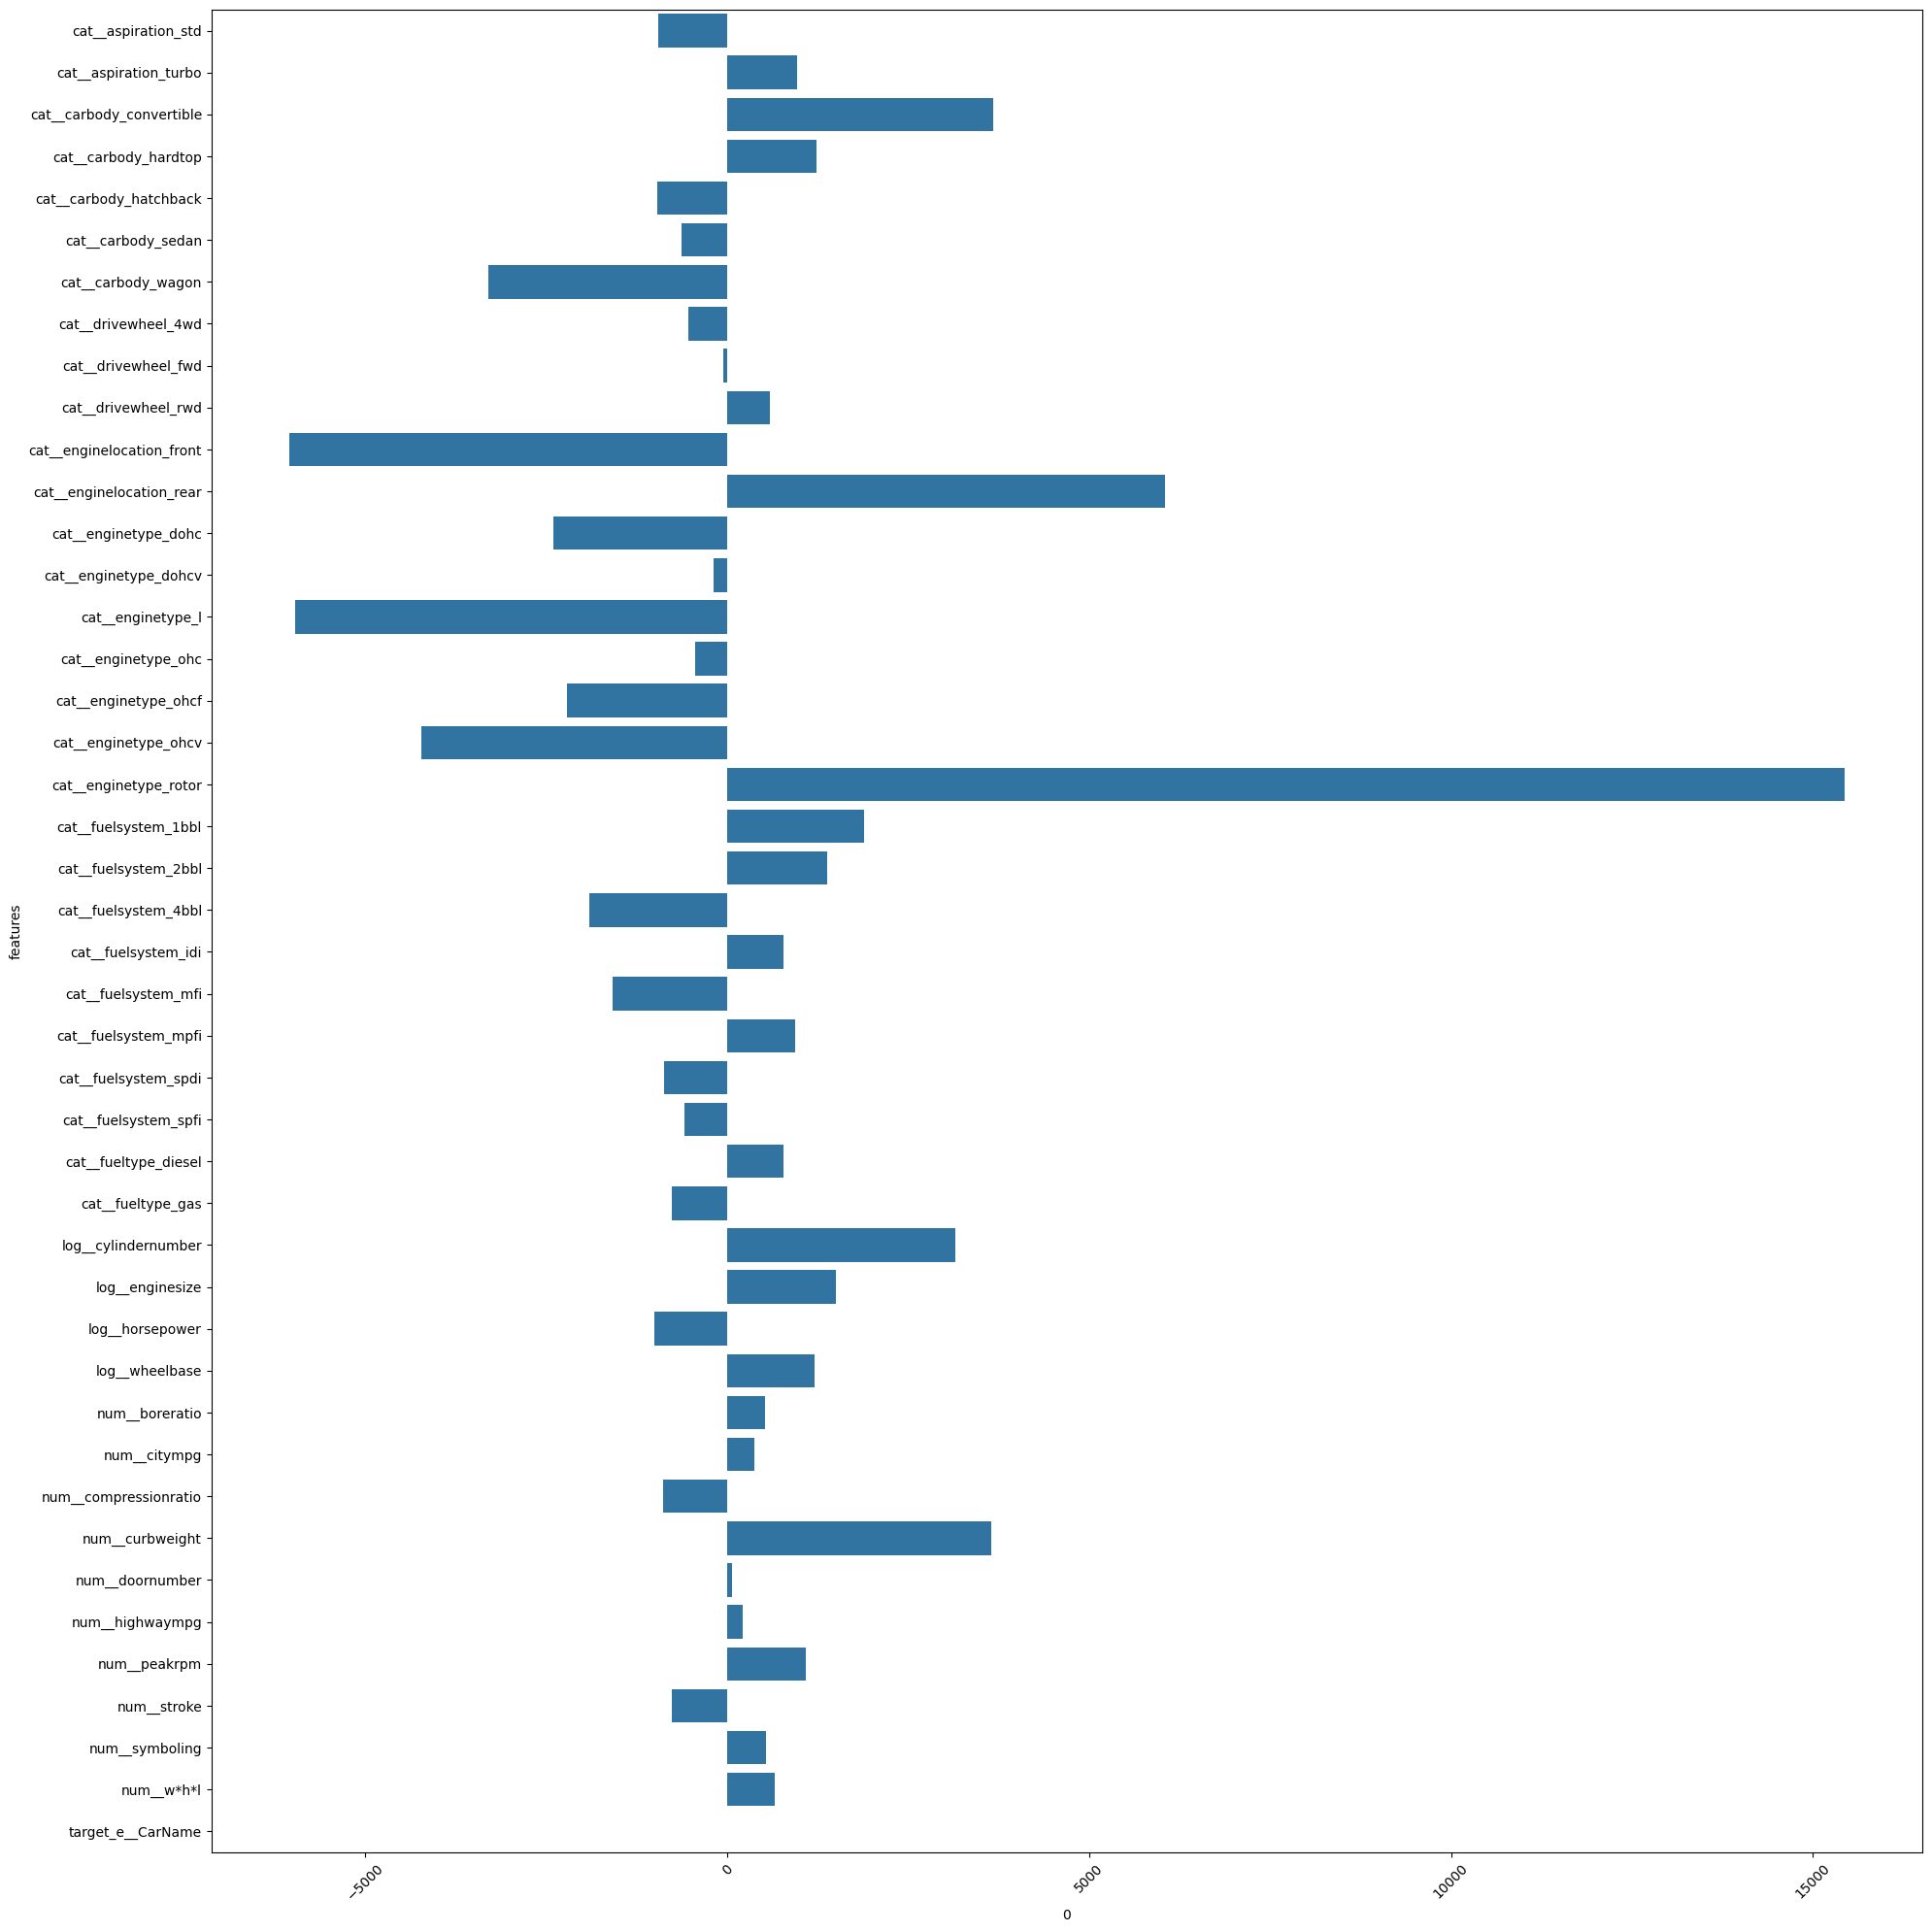

In [ ]:
coefdata1 = pd.DataFrame(coefs, index=features)
coefdata1.index.name = 'features'
coefdata1 = coefdata1.sort_values(by=['features', 0], ascending=[True, True])
figure= plt.figure(figsize=(20,20)) # Changed 'fisize' to 'figsize'
# plt
sns.barplot(data=coefdata1, y=coefdata1.index, x=coefdata1[0], orient="y" )
plt.xticks(rotation=45)
plt.tight_layout();

In [ ]:
# coef_importants=coefdata1.loc[(abs(coefdata1).mean(axis=1).iloc[0]<=abs(coefdata1[0]))].reset_index()
# f1=coef_importants['features'].apply(lambda x: x.split('_')[2])
# coef_importants['abs_coef'] = abs(coef_importants[0])
# new_c=pd.concat((coef_importants,f1), axis=1)

# grouped_data = new_c.groupby('features')['abs_coef'].mean() # Now groupby should work
# grouped_dataa

cf=coefdata1.reset_index()
cf['f11']=cf['features'].apply(split_name)
cf['abs']=cf[0].transform('abs')
mcf=cf.groupby('f11')['abs'].mean()
mcf.loc[(abs(cf[0]).mean(axis=0)*0.24<=mcf)].sort_values()




f11
boreratio            522.819307
symboling            533.015355
w*h*l                654.804758
stroke               772.444996
fueltype             772.595119
compressionratio     889.584482
aspiration           958.485422
horsepower          1007.505786
peakrpm             1086.651923
wheelbase           1208.825235
fuelsystem          1242.955630
enginesize          1506.678140
carbody             1963.341264
cylindernumber      3147.779039
curbweight          3649.048250
enginetype          4410.621236
enginelocation      6053.850960
Name: abs, dtype: float64

In [ ]:
important_columns=mcf.loc[(abs(cf[0]).mean(axis=0)*0.24<=mcf)].sort_values().index
important_columns

Index(['boreratio', 'symboling', 'w*h*l', 'stroke', 'fueltype',
       'compressionratio', 'aspiration', 'horsepower', 'peakrpm', 'wheelbase',
       'fuelsystem', 'enginesize', 'carbody', 'cylindernumber', 'curbweight',
       'enginetype', 'enginelocation'],
      dtype='object', name='f11')

### coef-->model.Important columns

In [ ]:
kurtosis_skew_explanantion

kurtosis        skew
symboling         outlier_olma_ehtimali_ashaqi   simmetrik
doornumber        outlier_olma_ehtimali_ashaqi   simmetrik
wheelbase         outlier_olma_ehtimali_ashaqi    cox_meyl
curbweight        outlier_olma_ehtimali_ashaqi  biraz_meyl
cylindernumber                  outlierler_var    cox_meyl
enginesize                      outlierler_var    cox_meyl
boreratio         outlier_olma_ehtimali_ashaqi   simmetrik
stroke            outlier_olma_ehtimali_ashaqi  biraz_meyl
compressionratio                outlierler_var    cox_meyl
horsepower        outlier_olma_ehtimali_ashaqi    cox_meyl
peakrpm           outlier_olma_ehtimali_ashaqi   simmetrik
citympg           outlier_olma_ehtimali_ashaqi  biraz_meyl
highwaympg        outlier_olma_ehtimali_ashaqi  biraz_meyl
w*h*l             outlier_olma_ehtimali_ashaqi  biraz_meyl
price             outlier_olma_ehtimali_ashaqi    cox_meyl

In [ ]:
new_important_log=kurtosis_skew_explanantion['skew'][kurtosis_skew_explanantion['skew']=='cox_meyl'].drop(['price']).index

In [ ]:
new_important=X_train[important_columns]
new_important_test=X_test[important_columns]
new_important_num_col=new_important.drop(new_important_log, axis=1).select_dtypes(include=[np.number]).columns
new_important_cat_col=new_important.select_dtypes(exclude=[np.number]).columns


In [ ]:

estimator_log1=LinearRegression()
l=Ridge(3)

full_pipeline_l=Pipeline([
    ('transform',log_transform_poly_pipe(new_important_cat_col,new_important_num_col,new_important_log, poly=True,poly_degree=2)),
    # ('estimator',estimator_log1), ##71- no polynimial linear(11 ferq), poly-80(16 ferq)
    ('l2',l) ##95-85
])

full_pipeline_l.fit(new_important,y_train)
full_pipeline_l.score(new_important,y_train),full_pipeline_l.score(new_important_test,y_test)


(0.9542859445633335, 0.8532841726180652)

## X_train_high_cor

### without polynomial/with poly

In [ ]:
X_h_c_train_log_col=['cylindernumber','enginesize','wheelbase','horsepower']
X_h_c_train_num=X_train_only_high_cor.drop(X_h_c_train_log_col, axis=1).select_dtypes(include=[np.number])
X_h_c_train_num_col=X_h_c_train_num.columns

X_h_c_train_target_encoder_col=['CarName']
X_h_c_train_cat=X_train_only_high_cor.drop(X_h_c_train_target_encoder_col, axis=1).select_dtypes(exclude=[np.number])
X_h_c_train_cat_col=X_h_c_train_cat.columns


In [ ]:
estimator_cor_1=LinearRegression()
l2norm_cor=Ridge()
l1norm_cor=Lasso(alpha=0.1,max_iter=10000)

model_cor_1=Pipeline([
    ('transform',transform_poly_pipe(X_h_c_train_cat_col,X_h_c_train_num_col,X_h_c_train_log_col,X_h_c_train_target_encoder_col,poly=True,poly_degree=2)),
    #  ('estimator', estimator_cor_1)##92-76--> no poly/ 94-86--> with poly 2
    ('l2',l2norm_cor) ## poly-->2/(94-87)
    # ('l1',l1norm_cor)
])

model_cor_1.fit(X_train_only_high_cor,y_train)

model_cor_1.score(X_test_only_high_cor,y_test),model_cor_1.score(X_train_only_high_cor,y_train)

(0.8721585209715432, 0.9451114264248062)

In [ ]:
model_cor_1.predict(X_test_only_high_cor.iloc[[10]]),y_test.iloc[10]

(array([17256.8872096]), np.float64(13295.0))

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = model_cor_1.predict(X_test_only_high_cor)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)

MAE: 2272.7474009510765


### from coef--> model

In [ ]:
estimator_cor_2=LinearRegression()

In [ ]:
model_cor_2=Pipeline([
    ('transform',transform_poly_pipe(X_h_c_train_cat_col,X_h_c_train_num_col,X_h_c_train_log_col,X_h_c_train_target_encoder_col,poly=False,poly_degree=2)),
     ('estimator', estimator_cor_2)##92-76--> no poly/ 94-86--> with poly 2
    # ('l2',l2norm_cor) ## poly-->2/(94-87)
    # ('l1',l1norm_cor)
])
model_cor_2.fit(X_train_only_high_cor,y_train)

Pipeline(steps=[('transform',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'fuelsystem', 'fuelt...
                                                                                   ('functiontransformer',
                                                                                    FunctionTransformer(feature_names_out='one-to-one',
                                                                                                        func=<ufunc 'log1p'>)),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['cylindernumber',
                                                                    'enginesize',
                                                                    'wheelbase',
                                                                    'horsepower']),
                                                                  ('target_e',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('targetencoder',
                                                                                    TargetEncoder())]),
                                                                   ['CarName'])]))])),
                ('estimator', LinearRegression())])

In [ ]:
coefs_h_c_1=model_cor_2.named_steps['estimator'].coef_
features_h_c_1=model_cor_2.named_steps['transform'].get_feature_names_out()
cfh1=pd.DataFrame(coefs_h_c_1, index=features_h_c_1 ).sort_values(by=0)
cfh=cfh1.reset_index()

cfh['f11']=cfh['index'].apply(split_name)
cfh['abs']=cfh[0].transform('abs')
mcfh=cfh.groupby('f11')['abs'].mean()
new_im_cor=mcfh.loc[(abs(cf[0]).mean(axis=0)*0.01<=mcfh)].sort_values()
# cfh
new_im_cor.index


Index(['fueltype', 'horsepower', 'highwaympg', 'citympg', 'drivewheel',
       'aspiration', 'boreratio', 'wheelbase', 'w*h*l', 'fuelsystem',
       'enginesize', 'carbody', 'cylindernumber', 'enginetype', 'curbweight',
       'enginelocation'],
      dtype='object', name='f11')

In [ ]:
new_important_log

Index(['wheelbase', 'cylindernumber', 'enginesize', 'compressionratio',
       'horsepower'],
      dtype='object')

In [ ]:
new_important_log_cor=new_important_log.drop(['compressionratio','horsepower']) #'horsepower'

In [ ]:
new_important_cor=X_train[new_im_cor.index]

new_important_test_cor=X_test[new_im_cor.index]
new_important_num_col_cor=new_important_cor.drop(new_important_log_cor, axis=1).select_dtypes(include=[np.number]).columns
new_important_cat_col_cor=new_important_cor.select_dtypes(exclude=[np.number]).columns

In [ ]:
new_important_num_col_cor

Index(['horsepower', 'highwaympg', 'citympg', 'boreratio', 'wheelbase',
       'w*h*l', 'enginesize', 'curbweight'],
      dtype='object')

In [ ]:
new_important_cat_col_cor

Index(['fueltype', 'drivewheel', 'aspiration', 'fuelsystem', 'carbody',
       'enginetype', 'enginelocation'],
      dtype='object')

In [ ]:
estimator_cor_l_2=LinearRegression()
l_2_cor=Ridge(1)

full_pipeline_l_2_cor=Pipeline([
    ('transform',log_transform_poly_pipe(new_important_cat_col_cor,new_important_num_col_cor,new_important_log_cor, poly=True,poly_degree=2)),
    # ('estimator',estimator_cor_l_2), ##91-77- no polynimial linear(11 ferq), poly-85(8 ferq)
    ('l2',l_2_cor) ##93-85
])

full_pipeline_l_2_cor.fit(new_important_cor,y_train)
full_pipeline_l_2_cor.score(new_important_cor,y_train),full_pipeline_l_2_cor.score(new_important_test_cor,y_test)

(0.9434020210038252, 0.8801086915875632)